# Exploration Project 02
### Regression - On a fine Monday at 3pm, how many bikers are there？

지난 시간에 분류 프로젝트를 실습 해 보는 시간을 가졌었다.

이번에는 회귀 프로젝트를 통하여 

머신러닝의 본질을 관통하는 철학과, 그 과정을 깊게 파고들며 이해해 보고자 한다.

## 1. Project 02_1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

첫 번째 프로젝트에서는 __당뇨병 데이터셋__ 을 활용하여

직접 선형 회귀 모델 설계, 손실 함수 정의, 기울기 계산 등 을 수행하고

회귀 모델을 진행하여 최종적으로 실수형 데이터 예측까지 진행하면서

회귀 프로세스를 체험하는 기회를 갖도록 하겠다.

### 1) 데이터셋 가져오기

데이터는 scikit-learn 에서 제공하고 있는 데이터셋의 당뇨병 데이터를 활용한다.

In [220]:
## 필요한 import 미리 해두자. 3대장
import pandas as pd                 ## pandas import
import numpy as np                  ## numpy import
import matplotlib as plt            ## matplotlib import

from sklearn.model_selection import train_test_split        ## train_test_split
import sklearn.datasets as sklds                            ## scikit-learn dataset import


## 당뇨병 데이터셋을 불러온다
diab_ds = sklds.load_diabetes(as_frame=True)    ## diabetes dataset

데이터셋의 내용을 확인해 보자

In [221]:
diab_ds.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

Classification(분류) 예측의 경우에는 target_name 이라는 항목이 있었는데

회귀 모델에는 라벨링 데이터(일종의 정답지 개념)를 포함하고 있지 않다.

DESCR 을 통해 대략적인 데이터셋의 정보를 확인해보자.

In [222]:
print(diab_ds.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

DESCR 과 scikit-learn 공식 문서를 통해서 얻을 수 있는 중요 정보는 이하의 내용과 같다.

번역기의 힘을 빌려보았다.<br><br>

<hr>

* 열 개의 기준선 변수, 연령, 성별, 체질량 지수, 평균 혈압 및 여섯 개의 혈청 측정치가<br>
<br>&nbsp;&nbsp;n=442명의 당뇨병 환자 각각에 대해 수득되었고, 관심의 반응뿐만 아니라, <Br>
<br>&nbsp;&nbsp;기준선 후 일년 후에 질병 진행의 정량적 척도를 얻었다.<br><br>


* 데이터 세트 특성：
    
    + 인스턴스 수：442

    + 속성 수：처음 10개 열은 숫자 예측 값.
    
    + 타겟：11열은 기준치로부터 1년 후 질병 진행에 대한 정량적 척도이다.
    
    + 속성 정보：<br>

        - age&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;나이<br>

        - sex&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;성별<br>

        - bmi&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;체질량 지수(體質量指數, body mass index, BMI)<br>

        - bp&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;평균 혈압<br>

        - s1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;tc, 혈중 콜레스테롤<br>

        - s2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ldl, 저밀도 지질단백질(低密度 脂質蛋白質, 영어: low-density lipoprotein, LDL/LDL-C)<br>

        - s3&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;hdl, 고밀도 지질단백질(高密度 脂質蛋白質, 영어: high-density lipoprotein, HDL)<br>

        - s4&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;tch, 총콜레스테롤(total cholesterol, TC)은 일반적으로 저밀도지질단백질(LDL)과 고밀도지질단백질(HDL) 그리고 중성지방(Neutral Fat)의 수치를 합산한 콜레스테롤수치<br>

        - s5&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ltg, 혈중 중성지방 수치<br>
        
        - s6&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;glu, 혈당 수치<br>
<br>
<br>

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of (i.e. the sum of squares of each column totals 1)<br>

참고: 이 10개의 피쳐 변수 각각은 표준 편차 곱하기 제곱근(즉, 각 열의 제곱합 합계 1)에 의해 중앙에 배치되고 스케일링되었습니다

<hr>

우리가 보통 건강검진 등을 통해 신체 측정 및 혈액 검사 등의 결과를 받았을때

확인 할 수 있는 항목들로 구성이 되어있다.

데이터의 형상을 미리 알아둬야 한다. 형상도 확인하자.

In [223]:
print("─" * 64)
print("diab_ds.data.shape :", diab_ds.data.shape)
print("diab_ds.target.shape :", diab_ds.target.shape)
print("─" * 64)
print(diab_ds.target.head())
print(diab_ds.target.tail())
print("─" * 64)

────────────────────────────────────────────────────────────────
diab_ds.data.shape : (442, 10)
diab_ds.target.shape : (442,)
────────────────────────────────────────────────────────────────
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, dtype: float64
────────────────────────────────────────────────────────────────


data：442 개의 인스턴스, 10개의 피쳐.

target：442 개의 인스턴스. dtype : float64, 실수값을 가진다.

혹시 데이터셋의 항목들 중에서, 문자열 타입의 데이터가 있었다면

pandas 의 get_dummies() 함수를 통해 __원-핫 인코딩(One Hot Encoding)__ 을 활용해야 한다.

그러나, 당뇨병 데이터셋의 데이터들은 모두 실수값 으로 이루어져 있기 때문에

이러한 과정은 생략한다.

당뇨병 데이터셋의 회귀 예측을 통해 우리가 얻으려는 값은 target 의 실수값 이라고 볼 수 있다.

가져온 데이터셋을 데이터와 타겟의 서브셋으로 나누도록 하겠다.

In [224]:
df_X = diab_ds.data
df_y = diab_ds.target

데이터와 타겟의 내용을 다시 한번 확인 해봤다.

In [225]:
## df_X 는 피쳐 데이터
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [226]:
## df_y 는 타겟 데이터
df_y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

그런데 막상 데이터 일부를 화면에 출력 해 보니, 수치들이 조금 이상하다.

원-핫 인코딩 할 필요가 없는 실수 값이라고는 하더라도

성별이야 값의 내용을 보면 두종류의 실수값으로 표시 되는데,

나이가 어째서…？ BMI, bp 등등 대부분의 값들이 정수값이 아니다.

전반적으로 정숫값을 가지고 있지 않다.

대부분의 값은 부호까지 있는 실수 값을 가지고 있는데, 

이는 앞서 __DESCR 확인하는 부분의 하단 참고사항__ 에 코멘트가 되어 있다.

(10개의 피쳐 변수 각각은 표준 편차 곱하기 제곱근(즉, 각 열의 제곱합 합계 1)에 의해 중앙에 배치되고 스케일링되었습니다)

이것은 scikit-learn 공식 문서의 [sklearn.datasets.load_diabetes 항목](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)에서도 찾아 볼 수 있는데


Load and return the diabetes dataset (regression).
| 항목| 내용 |
|-------------|---|
|Samples total|442|
|Dimensionality|10|
|Features|real, -.2 < x < .2|
|Targets|integer 25 - 346|

Features 부분을 보면 실수와 그 범위가 표시되어있다.




### 2) 모델에 입력할 데이터 X 준비하기 ／ 모델에 예측할 데이터 y 준비하기

자 일단 데이터셋은 가져왔는데, 여기서 한번 생각을 해 볼 필요가 있는 내용이 있다.

당뇨병과 관련하여, 나이와 성별이란 요소가 그렇게 중요한 요소일까？

나이야 혹시 그럴수도 있지만 성별이 영향을 끼칠까？

데이터셋에 꼭 필요한 데이터가 아니면 제거를 하는게 학습에 도움이 되지 않을까？

문득 그런 생각이 들었다.

당뇨병에 대한 지식이 많은것은 아니지만 혹시 모르니 일단 나이먼저 확인해 보자.

듣기로는 젊은 사람도 당뇨 많이 걸린다던데, 나이가 그렇게 중요한 요소일까…

필요 없으면 빼 버려도 될 거 같은데？

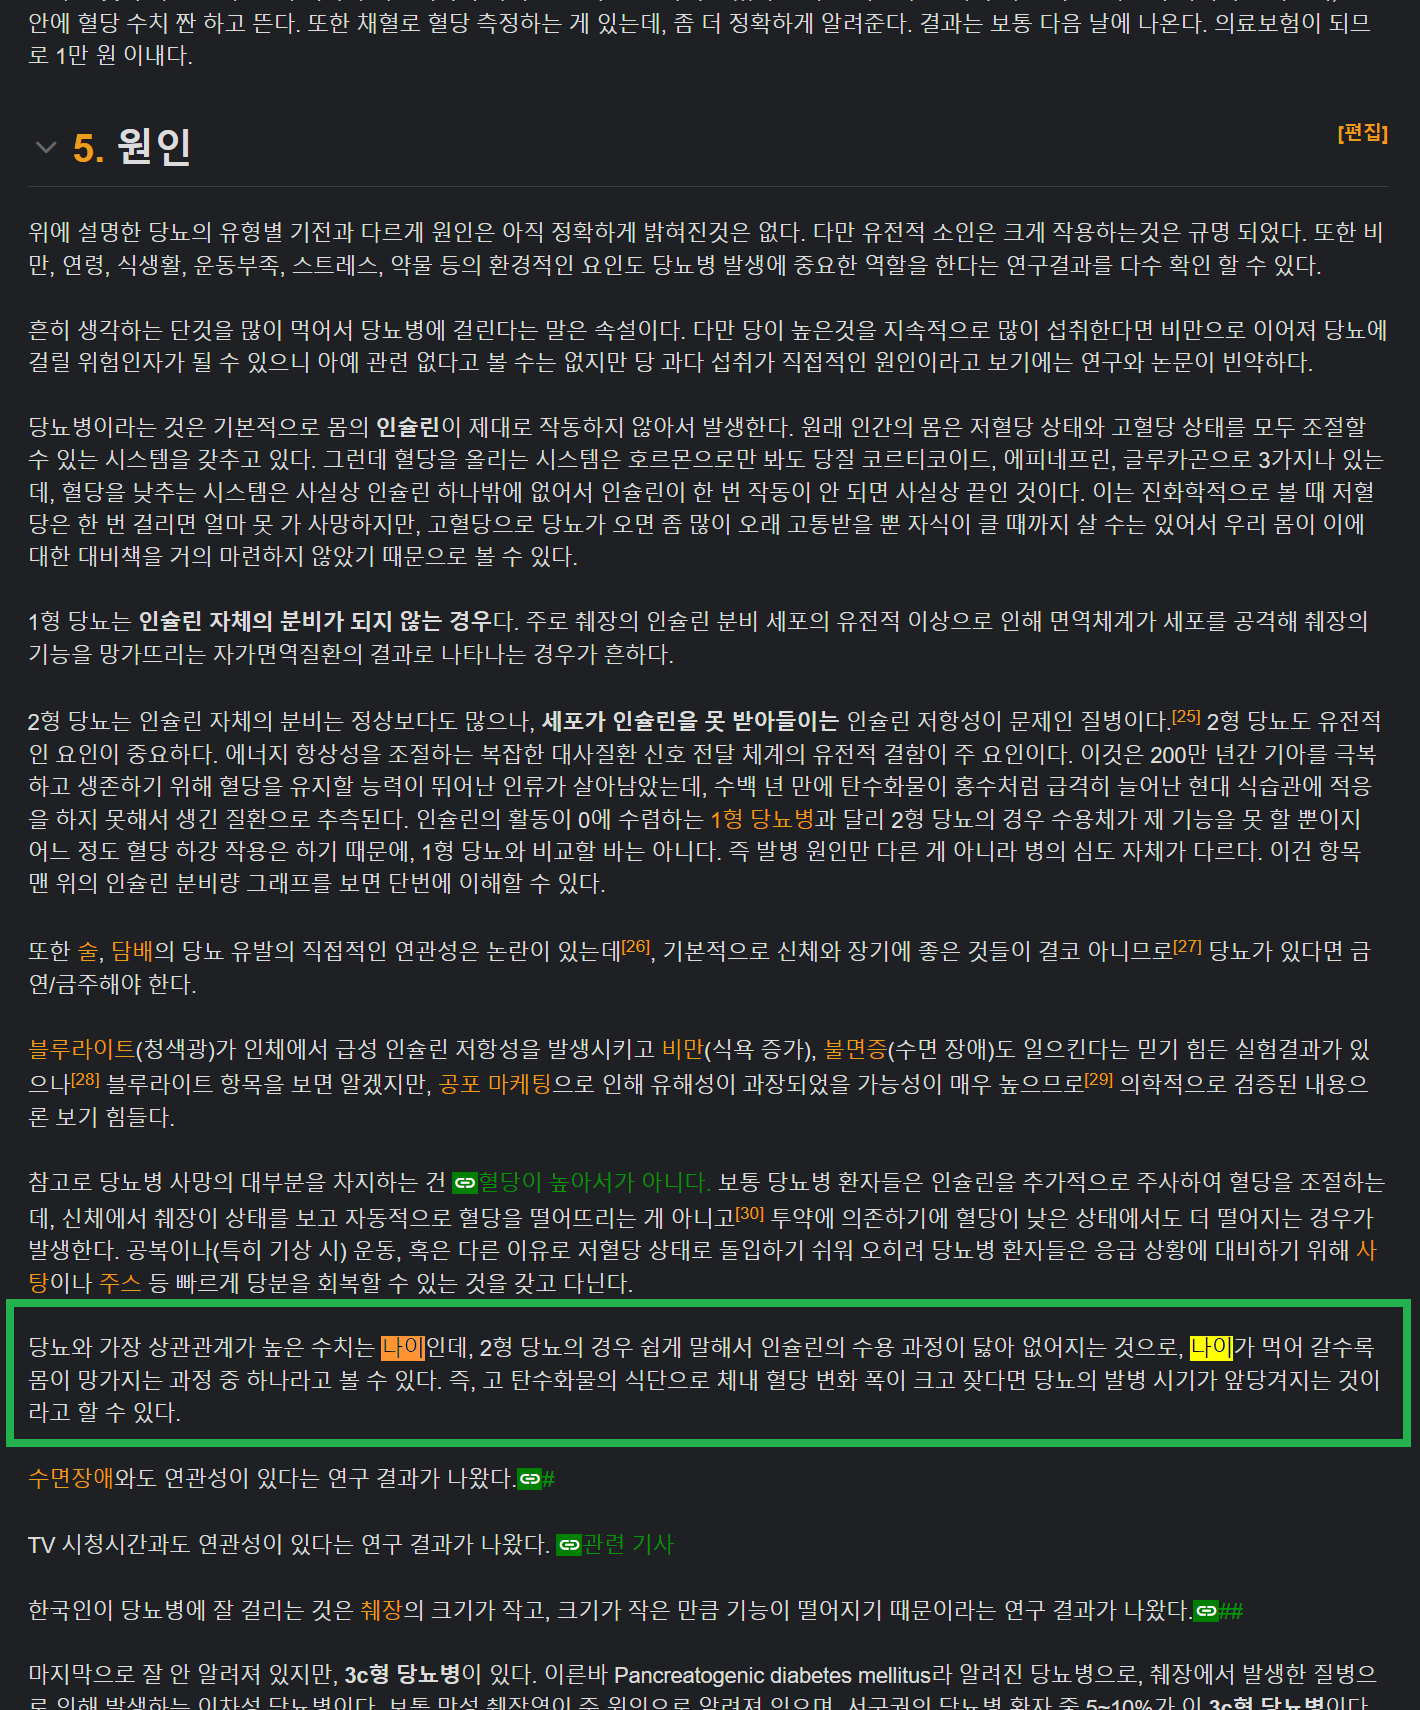

※ 참고 웹사이트：[당뇨병 5. 원인 - 나무위키](https://namu.wiki/w/%EB%8B%B9%EB%87%A8%EB%B3%91#toc)

나이는 아무래도 남기는게 좋겠다.

그렇다면 성별은？ 확인해 본 결과 성별이란 단어는 0 건 이었다.

큰 상관은 없는것 같으니, 성별은 제거하도록 하자.

In [227]:
## ◆ Pandas DataFrame 클래스 행／열삭제 (drop)
##━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
## DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
## labels : 삭제할 레이블명입니다. axis를 지정해주어야합니다.
## axis : {0 : index / 1 : columns} labels인수를 사용할경우 지정할 축입니다.
## index : 인덱스명을 입력해서 바로 삭제를 할 수 있습니다.
## columns : 컬럼명을 입력해서 바로 삭제를 할 수 있습니다.
## level : 멀티인덱스의 경우 레벨을 지정해서 진행할 수 있습니다.
## inplace : 원본을 변경할지 여부입니다. True일경우 원본이 변경됩니다.
## errors : 삭제할 레이블을 찾지 못할경우 오류를 띄울지 여부입니다. ignore할 경우 존재하는 레이블만 삭제됩니다.
##━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## 테스트 과정중에 여러번 실행 할 수 있어서 오류 안생기도록 ignore 지정

## 컬럼명 'sex'을 지정하여 삭제한다.
df_X = df_X.drop(columns='sex', errors='ignore')        
df_X.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


정상적으로 컬럼이 삭제 된 것을 확인 할 수 있다.

앞으로, 이 데이터셋의 피쳐는 9개 이다.

그 다음에는 데이터프레임 타입의 데이터(df_X)와 타겟(df_y)을 numpy array 타입으로 변환하는 과정을 수행한다.

In [228]:
X = df_X.to_numpy()
y = df_y.to_numpy()

데이터프레임 타입을 numpy array 타입으로 변경하는 것은 to_numpy() 함수를 이용하면 편하게 쓸 수 있다.

### 3) train 데이터 와 test 데이터 분리

train 데이터와 test 데이터를 분리하는 것은

scikit-learn 에서 제공하는 train_test_split() 함수를 이용하면 편하게 데이터를 처리할 수 있다.

In [229]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=9)

## train／test 분리 결과 출력
print("X_train.shape : ", X_train.shape, "\t\ty_train.shape :", y_train.shape)
print("X_test.shape :", X_test.shape, "\t\ty_test.shape :", y_test.shape)

X_train.shape :  (353, 9) 		y_train.shape : (353,)
X_test.shape : (89, 9) 		y_test.shape : (89,)


### 4) 모델 준비하기

앞서 분리한 당뇨병 데이터셋의 train, test 데이터들로부터 학습을 수행하고

학습을 통해 어떤 과정을 거쳐 우리가 원하는 값을 예측하는 기능을 만들어 갈 것이다.

모델은 일종의 함수와 비슷한 개념이라고 볼 수 있다.

여기서는 이러한 과정을,

당뇨병 데이터셋의 각종 측정치들을 이용하여 모델(함수)을 통해,

1년 후 질병 진행에 대한 예측을 하는 것이라고 비교할 수 있겠다.


우선 우리가 찾고자 하는 최적의 함수를 위해서 모델을 한단계씩 준비해 나가는 과정을 통해

회귀 모델이 어떻게 만들어 지고 작동하는지 알아보도록 하겠다.

기울기를 w, y절편을 b라고 하는 1차함수를 우선 구현해 보자.

w, b 의 알파벳들은 머신러닝 분야에서 굉장히 많이 쓰이는 표기법이라

학생시절에 배운 수학과 다르게, 일반적으로 이 문자들을 사용한다고 보면 된다.

그리고 여기서는 특성이 10가지 이므로 그것도 고려하고, 

W와 b는 랜덤한 값으로 초기값을 설정하도록 하며,

벡터인 W는 대문자를 사용하는데, 일반적인 관례 같은 것이라 보면 된다.

이를 구현하면 이하의 코드와 같다.

In [230]:
import numpy as np
W = np.random.rand(9)      ## 기울기 랜덤 9개
b = np.random.rand()        ## 가중치 랜덤 1개

print("W :", W)
print("b :", b)

W : [0.90625926 0.46058994 0.76965047 0.98061396 0.28303079 0.64920869
 0.84594873 0.38661439 0.11175863]
b : 0.860250570900511


W 와 b 값을 확인 해 보면, W 에는 10개의 랜덤 결과값이. b 에는 1개의 랜덤 결과값이 담겨져 있다.

다음으로 모델을 구현한다.

모델은 X, w, b를 입력받는 함수로 구성을 하는데

for 구문을 활용해 1부터 10까지 X * w를 수행하고, 마지막에 b를 더해주면 된다.

모델을 코드로 작성하면 다음과 같다.

In [231]:
def model(X, W, b):
    predictions = 0
    for i in range(9):                      ## 특성 갯수만큼
        predictions += X[:, i] * W[i]       ## 입력X 에 W 곱한다(기울기)
    predictions += b                        ## 가중치 더해줌
    return predictions

### 5) 손실 함수 loss 정의하기

우리가 찾으려 하는 최적의 함수 라는것은,

최소한의 오차를 낼 수 있는 __최적의__ 함수를 찾아야 한다는 것을 의미한다.

하지만 현실세계의 데이터는 이러한 함수를 구하는 과정이 한번에 이루어지지 않고

처음에는 오차가 크더라도 점차적으로 최적의 w 와 b 를 찾아가며

현실세계의 데이터에 대한 예측을 할 수 있는 모델을 찾기 위한

최적의 값을 찾기 위해 __손실함수__ 라는 지표를 설정하여 적용할 것이다.

손실함수는 __불완전한 현재의 모델이 출력하는 값과 실제 정답 간의 차이__ 를

확인하며 진행하는 데에 필요한 과정이라 할 수 있다.

완벽한 정답함수는 존재하지 않더라도, 

모델의 출력값과 실제 정답 간의 차이를 계산할 수 있고,

그 값을 점차 줄여나갈 수 있다면, 최적의 함수에 가까워질 수 있다는 논리이다.

> &nbsp;<br>
> + 내용을 정리하자면 다음과 같다.<br>
>&nbsp;<br>
> 1) 모델이 출력하는 값과 실제 정답 간의 차이를 계산<br>
<br>
> 2) 그 차이를 단계적으로 줄여나가는 순서로 모델을 학습<br>
>&nbsp;<br>

함수가 처음 예측을 수행 할 때에는, 예측값과 정답간의 차이가 매우 심한 상태이다.

여기서 이 차이를 계산해서, 모델이 계속하여 그 차이를 줄여 나갈 수 있도록 개선해 나갈 것인데,

여기서 모델의 오차를 평가하는 지표가 필요하다.

모델이 얼마나 틀렸는지를 평가하는 지표로는 4가지가 있는데,

- MAE : Mean Absolute Error, 오차의 절댓값의 평균

- MSE : Mean Squared Error, 오차의 제곱의 평균

- RMSE : Root Mean Squared Error, MSE의 제곱근

- R-squared : Coefficient of Determination, 결정 계수

가 있으며, 많이 사용하는 지표는 RMSE 가 되겠다.

RMSE는 말 그대로 MSE를 제곱근한 값인데, MSE는 제곱된 오차들의 평균이기 때문에

그 값의 단위를 원래 정답값과 맞춰주고자 제곱근을 씌운다는 개념이 담겨있다.

어떤 두 개의 값에 대한 RMSE 값을 구하는 함수는 다음과 같이 구현한다.

In [232]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  ## 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5            ## MSE의 제곱근
    return rmse

RMSE는 단지 MSE의 제곱근이므로, MSE의 경우는 제곱근하는 과정만 빼면 된다.

In [233]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  ## 두 값의 차이의 제곱의 평균
    return mse

이러한 모델의 예측값과 정답값에 대한 차이를 계산하는 함수를

__손실함수(loss function)__, 또는 __비용함수(cost function)__ 라고 부른다.

현재 모델이 얼마나 손실을 내고 있는지 나타낸다는 개념이라 볼 수 있다.

손실값(loss)이 크다는 것은 모델이 현재 정답과 굉장히 먼 예측을 하고 있다는 뜻이고, 

손실값이 작다는 것은 모델이 정답에 가까운, 

올바른 예측을 하고 있다는 것으로 해석할 수 있으므로 손실값은 작을수록 좋다.

앞서 구현한 모델에, 오차를 평가하는 지표를 반영하는 손실함수를 구현하면 다음과 같다.

여기서는 오차 지표로 MSE 를 사용하였다.

In [234]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### 6) 기울기를 구하는 gradient 함수 구현하기：기울기와 경사하강법

모델이 어느정도 오차를 가지고 있는지 계산하는 손실함수를 적용 하였으면,

이제 그 오차를 줄여나가기 위한 방법을 알아보자.

아래에서 알아볼 내용인 경사하강법(Gradient Descent) 의 이해를 위해,

만들었던 손실함수에 대해서 다시 한번 생각해 보자.

In [235]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


정의한 손실함수에서는 4개의 인자를 받고 있지만, 

이 중 출력인 loss(벡터라 대문자 return L 값)를 줄이도록

변경할 수 있는 변수는, 실제로 W 와 b 뿐이다.

아래의 그래프를 한번 보자.

아래부터는 매우 단순화 하여, 

최적의 b를 찾았다는 가정 하에 w 변수에 대해 접근하면서

경사하강법의 원리를 따라가 보겠다.

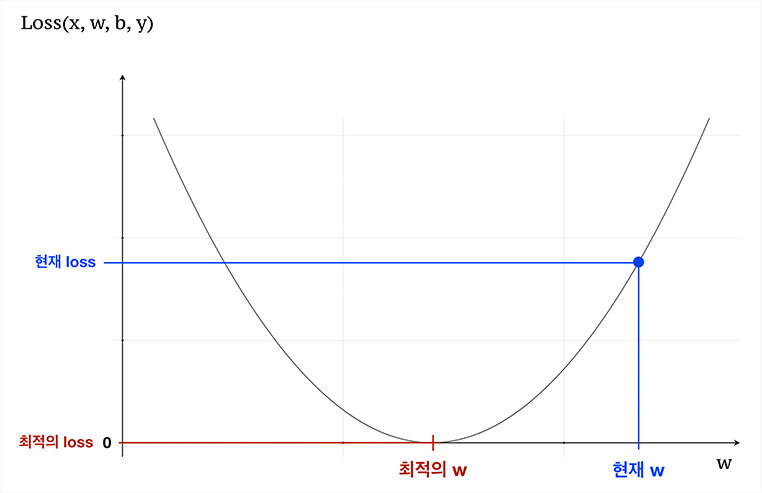

이 그래프에서 

- x축은 w 값을 나타내고 있다.

- y축은 loss값 (손실함수의 수치)

으로, 좌상단에 Loss(x,w,b,y) 라는 제목처럼, 

w 값에 따른 손실함수를 그래프로 그려놓은 것이다.

방금전에 나온 내용이지만, 다시 확인하자면, 

손실함수에서 변경 할 수 있는 값은 w 와 b 두개 뿐이고,

이 그래프는 b 는 최적값을 찾은 상태라고 가정하고 만들어진 그래프이다.

- 적색으로 표현한 __최적의 w__ 는 최소의 loss 값을 만드는 w 값이다.

왼편의 y 축 에서 확인 하듯, loss 가 0 으로, 

최소의 loss 값을 만드는 w 값을 표시 해 놓았다.

- 청색의 __현재 w__ 값은 w 값을 랜덤값이다.

모델을 구현하던 부분을 떠올려보면, 

최적의 w 값을 알지 못하기 때문에 랜덤값을 이용해서

w 값들을 미리 만들고, 그 값들이 얼마나 오차가 큰지 계산하는

MSE 함수도 구현했었다.

그래프에 대한 설명은 이정도로 하고.

결과적으로 현재의 w 를 최적의 w 로 옮기는 방법을 생각해 보자.

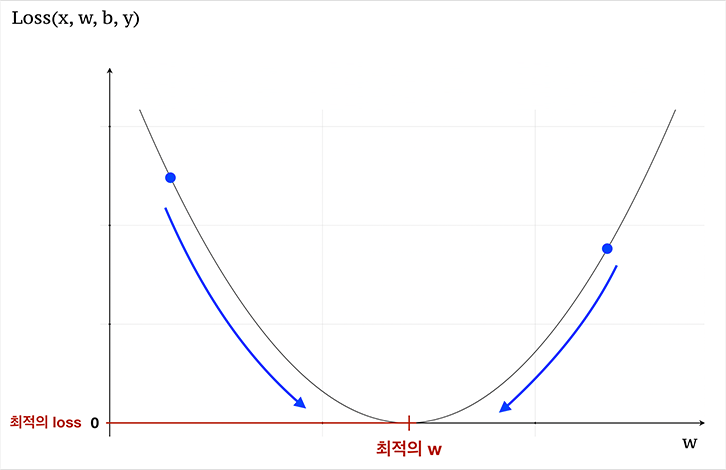


위 그래프를 보면, 두가지 상황을 생각해 볼 수 있다.

- 현재의 w 값이 최적의 w 의 왼쪽 에 위치하고 있는 경우,<br>
현재의 w 값이 최적의 w 보다 작다는 의미<br>
현재의 w 값이 커지도록 늘린다.

- 현재의 w 값이 최적의 w 의 오른쪽 에 위치하고 있는 경우<br>
현재의 w 값이 최적의 w 값보다 크다는 의미<br>
현재의 w 값이 작아지도록 줄인다.

이러한 방법을 통해 점차적으로 현재의 w 값을

최적의 w 에 가까워지게 만들어나갈 수 있다.

하지만, 여전히 최적의 w 값이 무엇인지를 모르기 때문에, 

현재 w 값 또한 최적의 w 보다 큰지 혹은 작은지를 알 수 없다.

그래서 여기에서 "기울기", 혹은 "그래디언트" 라는 기법을 사용한다.

위 그림의 왼쪽 점과 오른쪽 점에서 각각 기울기를 그려보면 다음과 같다.

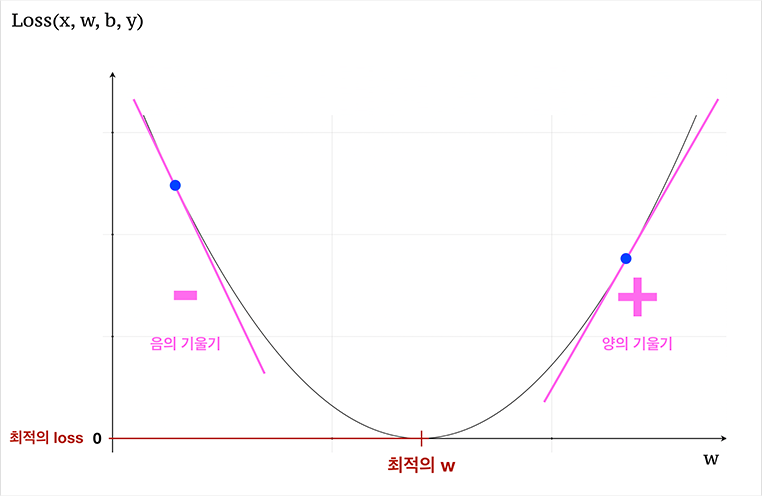

위 그래프에서, 두가지 경우에 대한 해설은 아래와 같다.

- 왼쪽 점은 자기 자신의 위치보다 오른쪽으로 갈수록 손실함수값이 점점 작아지기 때문에<br>
그 점에서 그린 접선은 오른쪽 아래로 향하는 방향 이고, 그 기울기는 음수.

- 오른쪽 점은 자기 자신의 위치보다 왼쪽으로 갈수록 손실함수값이 점점 작아지기 때문에<br>
그 점에서 그린 접선은 왼쪽 아래로 향하는 방향이고, 그 기울기는 양수.

이러한 과정을 통해 확인 할 수 있는 사실.

> &nbsp;
>
> - 기울기를 구하게 되면, 손실값이 작아지는 __방향__ 을 알 수 있다.
>
> &nbsp;

최적의 w 가 어디에 있는지,

현재 내 위치가 최적의 w 보다 오른쪽인지, 왼쪽인지 알지 못하더라도, 

현재 내 위치에서의 기울기만 알 수 있다면,

내 위치를 어느 방향으로 옮겨야 하는지를 알 수 있게 되는 것이다.

따라서 기울기를 활용해서 다음과 같은 규칙으로 w 를 업데이트 하면 되겠다.

>&nbsp;
>
> 1. 현재 w에서의 기울기를 구한다.
>
> 2. 기울기가 음수라면, 현재 w를 키운다.
>
> 3. 기울기가 양수라면, 현재 w를 줄인다.
>
>&nbsp;

이를 수식으로 나타내면 다음과 같다.

$$w' = w - \eta g$$

- $ w' $ : 새로운 w

- $ w $  : 현재 w

- $ \eta $ : 얼마나 업데이트를 할 지를 결정하는 상수 (학습률)

- $ g $ : 기울기, 또는 그래디언트

그러면 어떻게 $w'$를 효과적으로 업데이트하는지 살펴보자.

위에서 기울기가 음수라면 현재 w 를 크게 만들고, 

기울기가 양수라면 현재 w 를 작게 만든다고 했다.

그렇다면 복잡하게 생각할 것 없이,

그냥 w 에서 기울기를 빼 주는 것으로 원하는 동작이 된다.

따라서 다음과 같다.

- $g$ 가 음수라면, $w-g$ 식에서 $w$ 에서 음수를 빼주게 되므로 $w$ 는 커진다.

- $g$ 가 양수라면, $w-g$ 식에서 $w$ 에서 양수를 빼주게 되므로 $w$ 는 작아진다.

이것이 우리가 원하는 동작.

여기에서 $\eta$ 는 고정되어 있는 상수로,

$w$ 를 변화시키는 양을 조절하는 역할을 한다.

$w - \eta g$ 에서 $g$ 는 키울지, 줄일지에 대한 "방향과 크기"를, 

$\eta$ 는 얼마나 키울지／줄일지에 대한 "배율"을 결정한다.

이렇게 $\eta$ 와 $g$ , 두 가지 값으로

$w$ 를 계속 조금씩 키우거나, 줄여나가면서

점점 최적의 $w$ 에 가까워질 수 있다.

이렇게 기울기를 사용해서 점차적으로 매개변수를 업데이트 하는 방식을

Gradient Descent Method, 경사하강법 이라고 한다.

자 그래프와 과정 설명을 따라오다보니

여기까지는 이해하는데 큰 어려움이 없다.

다만, 이제 그 그래프에서 기울기를 구해야 하는데, 역시나 미분이 등장한다.

하지만 복잡한 수학 기호가 도무지 이해가 안되더라도 너무 무서워 할 필요는 없다.

본인도 미분에 대해 잘 모르지만, 어지간한 수학공식과 씨름하는 것은

이과생들이 학교에서 할 것이고, 우리 같은 사람들은 컴퓨터가 해 줄 테니까.

그래서 미분의 개념에 대해서는 약간의 개념만 알고 넘어가면 되겠다.

### 7) 기울기를 구하는 gradient 함수 구현하기 : 미분을 통한 기울기 계산

수학에서 해석이라 함은 미분과 적분을 의미하는데,

함수와 그래프의 세계에서, 해석의 최종 목표는 바로 미분과 적분을 말하는 것이다.

보통, ~~함수 라 하는 것들은 모두 미분ㆍ적분을 통하여 해석하는 대상을 가리킨다.

이차함수, 지수함수, 로그함수, 삼각함수~ 등을 말한다.

아래에서 수식은 제외하고, 이미지와 몇 개의 문장들로 요약을 해 보았다.

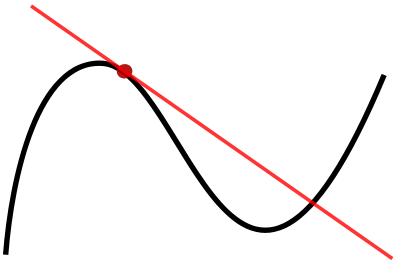

위 그림은 함수의 그래프와 그 접선을 나타내고 있다.

함수의 점에서의 미분은 그 점에서의 접선의 기울기와 같다.

미분(微分, 영어: derivative) 또는 도함수(導函數)는 어떤 함수의 __정의역__ 속 각 점에서

함숫값의 변화량과 독립 변숫값의 변화량 비의 극한 혹은 극한들로 치역이 구성되는 새로운 함수다.

어떤 함수의 미분 계수 또는 순간 변화율을 구하는 것을 의미한다.

미분 계수는 독립 변수 x의 증분에 관한 함숫값 ƒ(x)의 증분의 비가

한없이 일정한 값에 가까워질 때 그 일정한 값,

즉 함수에서 변수 x값의 변화량에 관한 함숫값 ƒ(x)의 변화량 비가

한없이 일정한 값에 가까워질 때 그 일정한 값 dy/dx로 나타낸다.

※ 참고 웹사이트：[위키백과 우리 모두의 백과사전 - 미분](https://ko.wikipedia.org/wiki/%EB%AF%B8%EB%B6%84)

여기서 정의역이란 아래의 자료를 참고하자.

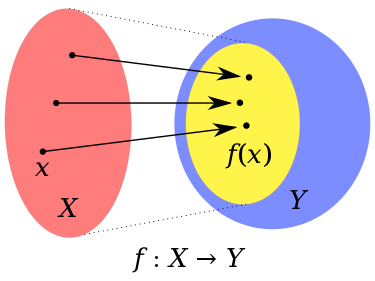

수학에서, 어떤 함수의 정의역(定義域, 영어: domain)은 그 함수의 값들이 정의된 집합이다.

※ 참고 웹사이트：[위키백과 우리 모두의 백과사전 - 정의역](https://ko.wikipedia.org/wiki/%EC%A0%95%EC%9D%98%EC%97%AD)

이러한 내용들 지금까지의 경사하강법이나 최적의 w 값 등을 떠올리다보니,

그것들이 어떤 의미였는지 약간 비슷한 연관점이 있다는 생각이 든다.

간단하게 미분이라는 것이 어떤것인지 직접 해석 할 줄은 모르더라도

뭘 잘게 분리하는지 의미를 알고 지나가도록 하자.

이제 기울기를 구하는 함수를 만들어보자.

지금은 직접 기울기를 계산하더라도, 향후에는 텐서플로우 등을 활용해서

아주 빠르고 간편한 코드로 기울기를 구하게 될 것이다.

위에서 설명의 편의를 위해 b 는 다루지 않고 w 만 다루었었다.

실제로 업데이트 해주어야 하는 변수, w 와 b 두 개의 기울기를

모두 계산하는 gradient 함수는 아래와 같다.

In [236]:
def gradient(X, W, b, y):
    N = len(W)                              # N은 가중치의 개수. 당뇨병 데이터셋에서의 특성 수
    y_pred = model(X, W, b)                 # y_pred 준비
    dW = 1/N * 2 * X.T.dot(y_pred - y)      # 공식에 맞게 gradient 계산
    db = 2 * (y_pred - y).mean()            # b의 gradient 계산

    return dW, db

미분은 영문 앞글자 d 를 따와서 dy / dx 로 나타낸다고 하였다.

여기서는 dw, db 라는 값이 보이는데, w 의 기울기, b 의 기울기 라고 보면 되겠다.

gradient 함수를 한번 실행 테스트 해보자

In [237]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -67.18984361 -210.6346449  -158.42101305  -75.72330795  -62.12762273
  141.91229515 -154.43087648 -203.13012647 -137.24478811]
db: -302.5464671839909


피쳐 수와 동일한 10개의 dw 기울기와,

b 의 기울기 값을 확인 할 수 있다.

### 8) 하이퍼파라미터 학습률 설정

지금까지의 과정을 이해하며, 회귀 학습에서의 대부분의 준비를 갖추었으니,

이제 경사하강법을 통해 반복적으로 가중치를 업데이트 해 가며 학습을 진행해보자.

먼저 경사하강법에서 필요했던 학습률, $\eta$ 상수를 정의한다.

학습률은, LEARNING_RATE 라는 변수에 숫자 값 1을 할당하겠다.

In [238]:
## 학습률
LEARNING_RATE = 1

여기서 학습률 지정과 같이

모델이 스스로 학습해나가는 파라미터가 아니라,

사람이 직접 사전에 정하고 시작해야 하는 파라미터를

__하이퍼 파라미터__ 라고 한다.

앞으로는 학습률뿐만 아니라 

다양한 하이퍼 파라미터를 많이 다루게 될 텐데,

실제 모델의 성능을 끌어올리기 위해서는

최적의 하이퍼 파라미터를 찾는 것 또한 매우 중요하다.

최적의 하이퍼 파라미터는 사람이 직접 찾아야 하기 때문에

많은 실험을 통해 찾을 수밖에 없다.

다만 최근에는 이러한 최적의 하이퍼 파라미터를 찾기 위한 실험을

편하고 빠르게 만들 수 있도록 하는 여러 가지 도구가 많이 개발되고 있다고 한다.

복잡한 데이터셋에서는 보통 학습률을

0.0001 ~ 0.01 정도의 작은 값으로 사용하지만,

간단한 실험에서는 학습률을 1 정도로 설정한다.

이제 하이퍼파라미터를 적용하며, 반복해서 학습을 진행하는 코드를 알아보자.


-  이하의 코드블럭은 실행하지 말고 내용만 확인하자.

```Python
losses = []     ## loss 함수의 계산값을 담을 리스트

for i in range(1, 2001):
    
    # 모델이 prediction을 예측하고, 손실함수값, 기울기 계산
    dw, db = gradient(X, W, b, y)

    W -= LEARNING_RATE * dw         # w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # b = b - η * db 로 업데이트 
    
    L = loss(X, W, b, y)            # 현재의 loss 값 계산
    
    losses.append(L)                # loss 함수 값 기록
    
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

plt.plot(losses)        ## loss 값을 그래프로 나타내자
plt.show()
```
<br>&nbsp;<br>
경사하강법으로 학습을 반복 진행 해 나가는 코드이다.

중간에 하이퍼파라미터 학습률이 포함되어 있는 것을 확인할 수 있다.

w' = w - η * dw 와 b' = b - η * db 의 업데이트를 반복하면서

loss 함수(손실함수) 값을 를 점점 줄여나가는 로직임을 기억해두자.

### 9) 모델 학습하기

이제는 아래의 순서대로 코드를 구현하는 일이 남았다.

>&nbsp;<br>
>1. 입력 데이터 x 와 정답 데이터 y 준비<br>
><br>
>2. 초기 w , b 를 랜덤하게 선택<br>
><br>
>3. 현재의 w 와 b 로 모델이 prediction을 예측하고,<br>그 값과 y 값을 비교해서 손실함수값 계산<br>
><br>
>4. 손실함수값을 계산함과 동시에 그 점에서의 기울기, gradient 계산<br>
><br>
>5. 계산된 gradient를 활용해서 $w'=w-\eta g$ , $b'=b-\eta g$ 로 업데이트<br>
><br>
>6. 3~5 번의 과정을 손실함수가 충분히 줄어들 때까지 반복<br>
><br>
>&nbsp;

그러면 이제 1~6 번 순서대로 한단계식 코드를 다시 정리해보자.

In [239]:
## 1. 입력 데이터 x 와 정답 데이터 y 준비

## 필요한 import 미리 해두자. 3대장
import pandas as pd                 ## pandas import
import numpy as np                  ## numpy import
import matplotlib.pyplot as plt     ## matplotlib import

from sklearn.model_selection import train_test_split        ## train_test_split
import sklearn.datasets as sklds                            ## scikit-learn dataset import


## 당뇨병 데이터셋을 불러온다
diab_ds = sklds.load_diabetes(as_frame=True)    ## diabetes dataset


## 모델에 입력할 데이터 X , y 준비하기
df_X = diab_ds.data
df_y = diab_ds.target

## 컬럼명 'sex'을 지정하여 삭제한다.
df_X = df_X.drop(columns='sex', errors='ignore')

X = df_X.to_numpy()
y = df_y.to_numpy()


## train 데이터와 test 데이터로 분리하기
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=9)

## train／test 분리 결과 출력
# print("X_train.shape : ", X_train.shape, "\t\ty_train.shape :", y_train.shape)
# print("X_test.shape :", X_test.shape, "\t\ty_test.shape :", y_test.shape)

In [240]:
## 2. 초기 w , b 를 랜덤하게 선택

## 기울기와 가중치를 랜덤하게 할당
W = np.random.rand(9)       ## 기울기 랜덤 9개
b = np.random.rand()        ## 가중치 랜덤 1개
print("W :", W)
print("b :", b)

W : [0.05675279 0.92953444 0.7205754  0.97793874 0.08785895 0.19750956
 0.50243243 0.24184372 0.64750605]
b : 0.9033996250546114


In [241]:
## 모델 구현
def model(X, W, b):
    predictions = 0
    for i in range(9):                      ## 특성 갯수만큼
        predictions += X[:, i] * W[i]       ## 입력X 에 W 곱한다(기울기)
    predictions += b                        ## 가중치 더해줌
    return predictions
	

## 손실함수 loss 정의 - 오차 평가지표 : MSE, RMSE
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  ## 두 값의 차이의 제곱의 평균
    return mse
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse


## 손실함수 loss 정의
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


## 기울기를 구하는 gradient 함수
def gradient(X, W, b, y):
    N = len(W)                              # N은 가중치의 개수. 당뇨병 데이터셋에서의 특성 수
    y_pred = model(X, W, b)                 # y_pred 준비
    dW = 1/N * 2 * X.T.dot(y_pred - y)      # 공식에 맞게 gradient 계산
    db = 2 * (y_pred - y).mean()            # b의 gradient 계산

    return dW, db

Iteration 100 : Loss 3039.8419
Iteration 200 : Loss 2994.4849
Iteration 300 : Loss 2988.1797
Iteration 400 : Loss 2986.5410
Iteration 500 : Loss 2985.7182
Iteration 600 : Loss 2985.0980
Iteration 700 : Loss 2984.5541
Iteration 800 : Loss 2984.0522
Iteration 900 : Loss 2983.5793
Iteration 1000 : Loss 2983.1286


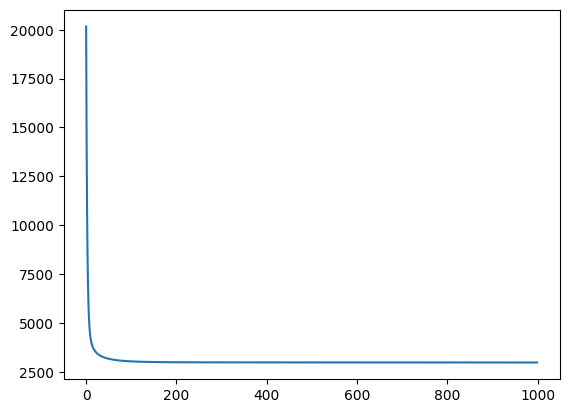

In [242]:
## 3. 현재의 w 와 b 로 모델이 prediction을 예측하고, 
##    그 값과 y 값을 비교해서 손실함수값 계산
## 4. 손실함수값을 계산함과 동시에 그 점에서의 기울기, gradient 계산
## 5. 계산된 gradient를 활용해서 w , b 업데이트
## 6. 3~5 번의 과정을 손실함수가 충분히 줄어들 때까지 반복


## 하이퍼 파라미터인 학습률 설정
LEARNING_RATE = 0.1

losses = []     ## loss 함수 값 리스트 변수

for i in range(1, 1001):
    dw, db = gradient(X_train, W, b, y_train)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    W -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(X, W, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록 (손실함수 값 기록)
    
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
plt.plot(losses)    ## 손실함수 값 시각화
plt.show()

코드의 실행 결과, 문자열 출력 내용을 보면

loss 값이 초기 값 대비 많이 줄어든 것을 확인 할 수 있고,

이를 losses 변수 내용의 시각화 한 그래프를 통해서도 확인할 수 있다.

W, b 값을 확인해보자

In [243]:
print("W :", W)
print("b :", b)

W : [ -36.4627117   510.24717066  285.84924357 -126.26469942   -1.83846039
 -153.19861974   37.25026239  567.87912477   48.980032  ]
b : 153.12160385534193


당연하겠지만 값이 처음과 많이 달라져있다.

### 10) test 데이터에 대한 성능 확인하기

그렇다면 학습에 사용되지 않은 test 데이터들에 대해서는

loss 값이 얼마나 나올지 확인해 보자.

In [244]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2185.3259271138204

학습 결과 후반부에 대폭 줄어든 loss 값 처럼

값이 적게 나오는 것을 확인 할 수 있다.

train 데이터 학습을 어느정도 진행 하고 loss 값이 2985 정도에 도달했는데

test 데이터의 경우엔 2185 정도의 loss 값을 확인 할 수 있다.

### 11) 정답 데이터와 예측한 데이터 시각화하기

마지막으로 모델이 예측한 prediction 과 실제 정답 y_test 를 비교해서,

예측이 얼마나 적중했는지 그래프를 통해 확인해 보도록 하겠다.

X_test 의 각 행의 첫 번째 데이터는 'age' 이다. 

(몰랐었는데 당뇨병 원인에 상당히 중요한 요소라고)

시각화 코드는 다음과 같다.

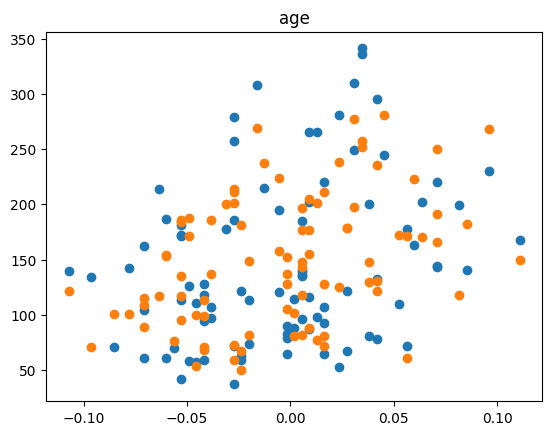

In [245]:
## order：age, bmi, bp, s1, s2, s3, s4, s5, s6,

plt.title("age")
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

생각보다 별로인듯한 느낌이다… BMI 는 어떨까

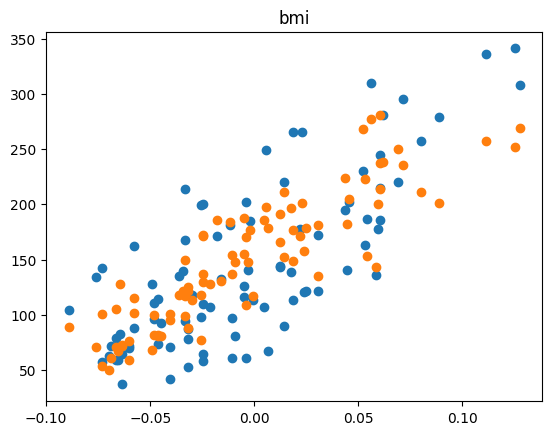

In [246]:
## order：age, bmi, bp, s1, s2, s3, s4, s5, s6,
plt.title("bmi")
plt.scatter(X_test[:, 1], y_test)
plt.scatter(X_test[:, 1], prediction)
plt.show()

혈압은？

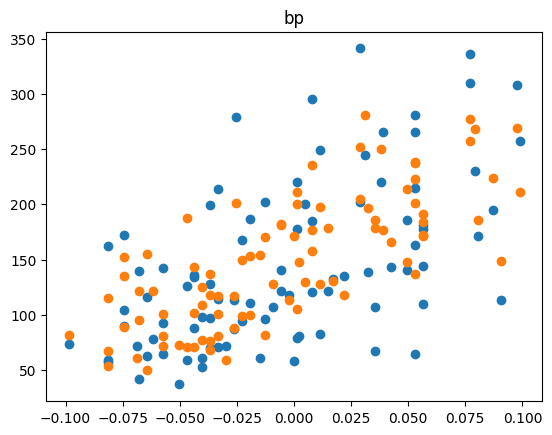

In [247]:
## order：age, bmi, bp, s1, s2, s3, s4, s5, s6,

plt.title("bp")
plt.scatter(X_test[:, 2], y_test)
plt.scatter(X_test[:, 2], prediction)
plt.show()

나머지는 어떨까

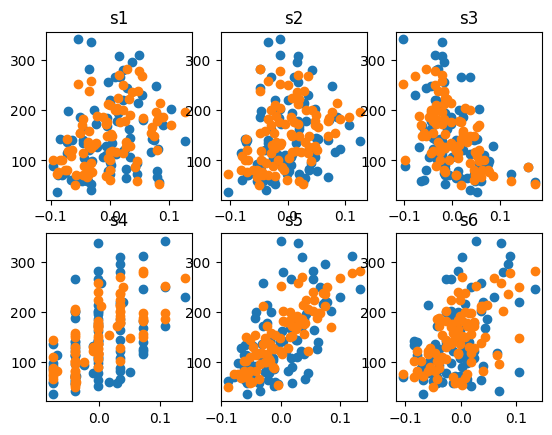

In [248]:
plt.subplot(231)
plt.title("s1")
plt.scatter(X_test[:, 3], y_test)
plt.scatter(X_test[:, 3], prediction)

plt.subplot(232)
plt.title("s2")
plt.scatter(X_test[:, 4], y_test)
plt.scatter(X_test[:, 4], prediction)

plt.subplot(233)
plt.title("s3")
plt.scatter(X_test[:, 5], y_test)
plt.scatter(X_test[:, 5], prediction)

plt.subplot(234)
plt.title("s4")
plt.scatter(X_test[:, 6], y_test)
plt.scatter(X_test[:, 6], prediction)

plt.subplot(235)
plt.title("s5")
plt.scatter(X_test[:, 7], y_test)
plt.scatter(X_test[:, 7], prediction)

plt.subplot(236)
plt.title("s6")
plt.scatter(X_test[:, 8], y_test)
plt.scatter(X_test[:, 8], prediction)

plt.show()

이렇게 놓고 보니 어느정도 비슷한 느낌이다.

당뇨병 데이터셋 회귀 모델의 경우는 이정도에서 마무리 하도록 하겠다.

<hr>

## 2. Project 02_2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명？


이번에 사용할 데이터셋은 캐글(Kaggle)에서 제공하는 데이터셋이다.

데이터 셋의 본래 제목은 이렇다.

>&nbsp;<br>
>Bike Sharing Demand : Forecast use of a city bikeshare system<br>
(자전거 공유 수요 - 도시 자전거 공유 시스템의 사용 예측)<br>
>&nbsp;


이 데이터셋의 주제는

시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통한 자전거 대여량 예측이다.

이번 프로젝트에서는 직접 손실함수와 기울기를 계산하지 않고,

사이킷런(sklearn)의 LinearRegression 모델을 활용하여 진행하도록 하겠다.

### 1) 데이터 준비하기

- [Kaggle - Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand/data)<br>
이 캐글 공모전 웹페이지에서 데이터를 내려받을 수 있다.

필요한 파일은 train.csv 파일이다.

웹페이지의 타이틀 바로 하단의 개요, 데이터 등의 내용을 읽어보자.

개요에는 자전거 공유 프로그램이란 무엇인지 간단하게 설명하고 있다.

우리가 익히 아는 그 시스템이다.

그러한 시스템에 의해 생성 된 데이터는

여행기간, 출발위치, 도착위치, 경과시간 등이 기록되기 때문에

데이터연구를 하기에 매력적이라고 한다.

자전거 대여 수요를 예측하기 위해서는 과거 사용 패턴과 날씨 데이터를

결합해서 예측을 수행해야 될거라는 듯한 내용이 적혀있다.

또한 산출물의 평가 관련하여, 제출형식과 더불어

RMSLE(Root Mean Squared Logarithmic Error) 계산식을 제공하고 있는데

여기서는 다루지 않는다.

데이터셋 설명에서는 데이터 필드에 대한 설명이 나와있다.


```

datetime - hourly date + timestamp  

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

          2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

          3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

          4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

```

일단 대략 어떤 내용인지, 실제로 데이터를 확인해 보자.

In [249]:
## import
import pandas as pd
import seaborn as sns

## train.csv 파일 로컬 경로에서 불러오기
# train = pd.read_csv("bike-sharing-demand\\train.csv")
# train.head()
# train.shape


## 파일 URL 로 불러오기는 3일？ 정도는 잘 작동 했는데 갑자기 찾을 수 없다고 나옴.
## 새로 링크 만들어 넣으면 되는거 같긴 하지만, 그냥 로컬 파일 가져다 쓰는 방법으로 하겠다.

## train.csv 파일 URL로 불러오기 (kaggle competitions download URL)
##train = pd.read_csv("https://storage.googleapis.co …이건 링크 수명이 있는것 같다. 더이상 사용하지 않는다 … sponse-content-disposition=attachment%3B+filename%3Dtrain.csv")

## test.csv 파일 URL로 불러오기 (kaggle competitions download URL)
##test = pd.read_csv("https://storage.googleapis.com/kagglesdsdata/competitions/  … 이건 링크 수명이 있는것 같다. 더이상 사용하지 않는다 … .csv")


train = pd.read_csv("bike-sharing-demand\\train.csv")
test = pd.read_csv("bike-sharing-demand\\test.csv")



train , test 정보를 살펴보자

In [250]:
print(train.shape)
print("━" * 64)
train.info()

(10886, 12)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [251]:
print(test.shape)
print("━" * 64)
test.info()

(6493, 9)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


train 의 count 가 target 에 해당한다.

그리고 test 수가 제법 많은 편이다.

| |data(row) | feature(column)|
|----|----|----|
|train|10886|12|
|test|6493|9|

In [252]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [253]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


일단 위의 코드들과 캐글 웹페이지의 데이터셋 설명을 통해

확인 할 수 있는 부분은 다음과 같다.

- 전체 데이터가 non-null 이라 결측치가 없이, 뭐라도 값이 채워진 데이터셋이다.

- 컬럼에 숫자가 아닌 Object 데이터 타입의 컬럼이 존재한다. (datetime 컬럼)

- train.csv 에서 count 는 target 임을 확인 가능하다.

- test.csv 에는 없는 컬럼 2개가 train.csv 에 있다. (casual, registered 컬럼)

- train.csv 는 2011-01-01 00:00:00 ~ 2012-12-19 23:00:00 까지의 자료이다. (10886 건)

- test.csv 는 2011-01-20 00:00:00 ~ 2012-12-31 23:00:00 까지의 자료이다. (6493 건)

- train 은 보통 매달 1~19일 까지의 자료로 구성되어 있고, test 는 20~31일 까지의 자료로 이루어져 있다.

- season 컬럼은 계절을 의미. （1：봄, 2：여름, 3：가을, 4：겨울）

- holiday 는 휴일 / workingday 는 평일. 다만 여기서 말하는 휴일 평일의 기준이 내 생각과는 좀 다른듯한 느낌이다.

- weather 는 날씨를 의미. （1：맑음, 2：안개, 3：약간의 비를 동반 한다거나 날씨 안좋음, 4：폭우 등 날씨 상당히 안 좋음）

- temp 는 온도를 의미. Celcius 는 섭씨.

- atemp 는 체감 온도를 의미. 마찬가지로 섭씨로 표현.

- humidity 습도를 의미.

- windspeed 풍속을 의미.

- casual 은 비회원의 대여.

- registered 는 회원의 대여.

- count 는 총 대여량을 의미.

-------

## 2) datetime 컬럼을 datetime 자료형으로 변환하고<br>연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

일단 이전에 확인 했던, 자료형이 숫자가 아닌 object 인 datetime 컬럼을

datetime 자료형으로 변환하고,

연, 월, 일, 시, 분, 초의 6개의 컬럼을 생성해서 값을 할당하는 것이 먼저다.


In [254]:
## datetime 의 자료형을 datetime 자료형으로 변경.
if (train["datetime"].dtype.name == "object"):
    train['datetime'] = pd.to_datetime(train['datetime'])
if (test["datetime"].dtype.name == "object"):
    test['datetime'] = pd.to_datetime(test['datetime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


datetime 컬럼 자료형을 object → datetime64 로 바꿨다

In [255]:
## 혹시 모르니 사본을 사용하자
train_copy  = train.copy()
test_copy = test.copy()

train_copy["dtY"] = train_copy['datetime'].dt.year   ## 연 dtY 컬럼을 만들어서 추가
train_copy["dtM"] = train_copy['datetime'].dt.month  ## 월 dtM 컬럼을 만들어서 추가
train_copy["dtD"] = train_copy['datetime'].dt.day    ## 일 dtD 컬럼을 만들어서 추가
train_copy["dth"] = train_copy['datetime'].dt.hour   ## 시 dth 컬럼을 만들어서 추가
train_copy["dtm"] = train_copy['datetime'].dt.minute ## 분 dtm 컬럼을 만들어서 추가
train_copy["dts"] = train_copy['datetime'].dt.second ## 초 dts 컬럼을 만들어서 추가

test_copy["dtY"] = test_copy['datetime'].dt.year   ## 연 dtY 컬럼을 만들어서 추가
test_copy["dtM"] = test_copy['datetime'].dt.month  ## 월 dtM 컬럼을 만들어서 추가
test_copy["dtD"] = test_copy['datetime'].dt.day    ## 일 dtD 컬럼을 만들어서 추가
test_copy["dth"] = test_copy['datetime'].dt.hour   ## 시 dth 컬럼을 만들어서 추가
test_copy["dtm"] = test_copy['datetime'].dt.minute ## 분 dtm 컬럼을 만들어서 추가
test_copy["dts"] = test_copy['datetime'].dt.second ## 초 dts 컬럼을 만들어서 추가

print(train_copy.shape)
train_copy.info()


(10886, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  dtY         10886 non-null  int64         
 13  dtM         10886 non-null  int64         
 14  dtD         10886 non-null  int64         
 15  dth         10886 non-null  int64         
 16  dtm       

원하던 결과를 확인했다.

### 3) year, month, day, hour, minute, second 데이터 개수 시각화하기

대여량을 시간단위별로 구분 해보자.

일단 테스트 삼아서 연도별 자료부터 만들어 보자.

데이터는 2011년, 2012년의 연간 자료가 있음을 확인 했고,

count 값을 합쳐보면, 연도별 총 대여 수를 알 수 있을 것이다.

In [256]:
year_data = train_copy["count"].groupby(train_copy["dtY"]).sum().reset_index(name="totalcount")
year_data

,dtY,totalcount
0,2011,781979
1,2012,1303497


데이터가 잘 만들어 졌으니, 나머지도 데이터별로 준비한다.

In [257]:
month_data = train_copy["count"].groupby(train_copy["dtM"]).sum().reset_index(name="totalcount")
day_data = train_copy["count"].groupby(train_copy["dtD"]).sum().reset_index(name="totalcount")
hour_data = train_copy["count"].groupby(train_copy["dth"]).sum().reset_index(name="totalcount")
min_data = train_copy["count"].groupby(train_copy["dtm"]).sum().reset_index(name="totalcount")
sec_data = train_copy["count"].groupby(train_copy["dts"]).sum().reset_index(name="totalcount")

month_data

,dtM,totalcount
0,1,79884
1,2,99113
2,3,133501
3,4,167402
4,5,200147
5,6,220733
6,7,214617
7,8,213516
8,9,212529
9,10,207434


일단 시각화를 해보자.

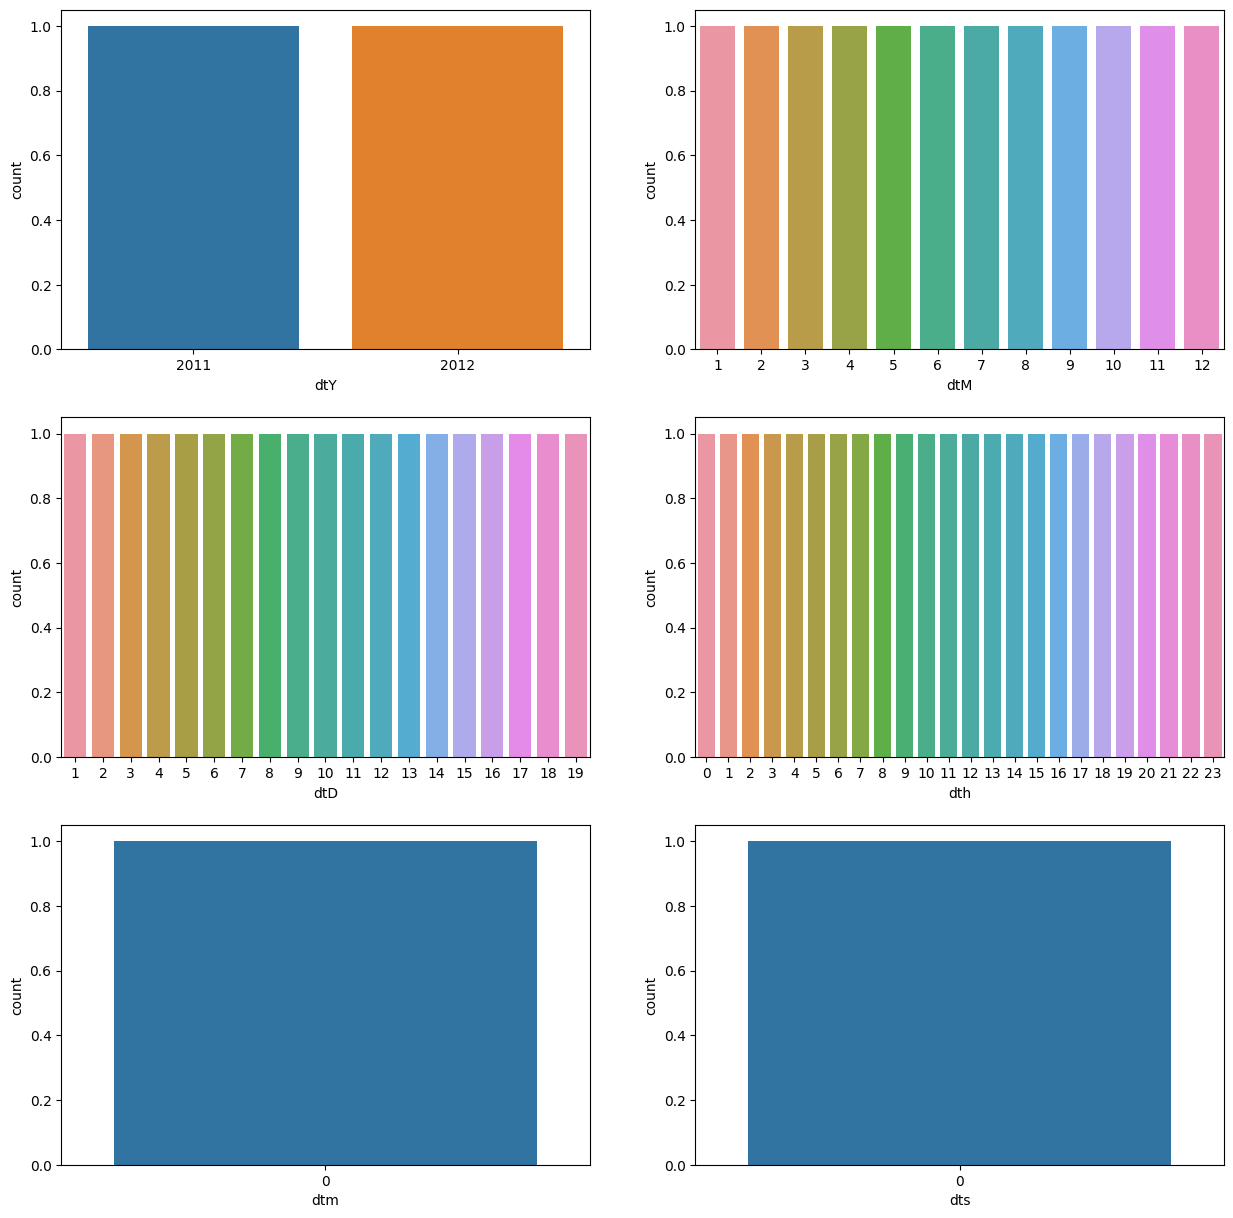

In [258]:
## sns.countplot 과 subplot 이용 한번에 6개의 그래프 시각화
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(15, 15)

sns.countplot(data=year_data, x="dtY", ax=ax1)
sns.countplot(data=month_data, x="dtM", ax=ax2)
sns.countplot(data=day_data, x="dtD", ax=ax3)
sns.countplot(data=hour_data, x="dth", ax=ax4)
sns.countplot(data=min_data, x="dtm", ax=ax5)
sns.countplot(data=sec_data, x="dts", ax=ax6)
plt.show()


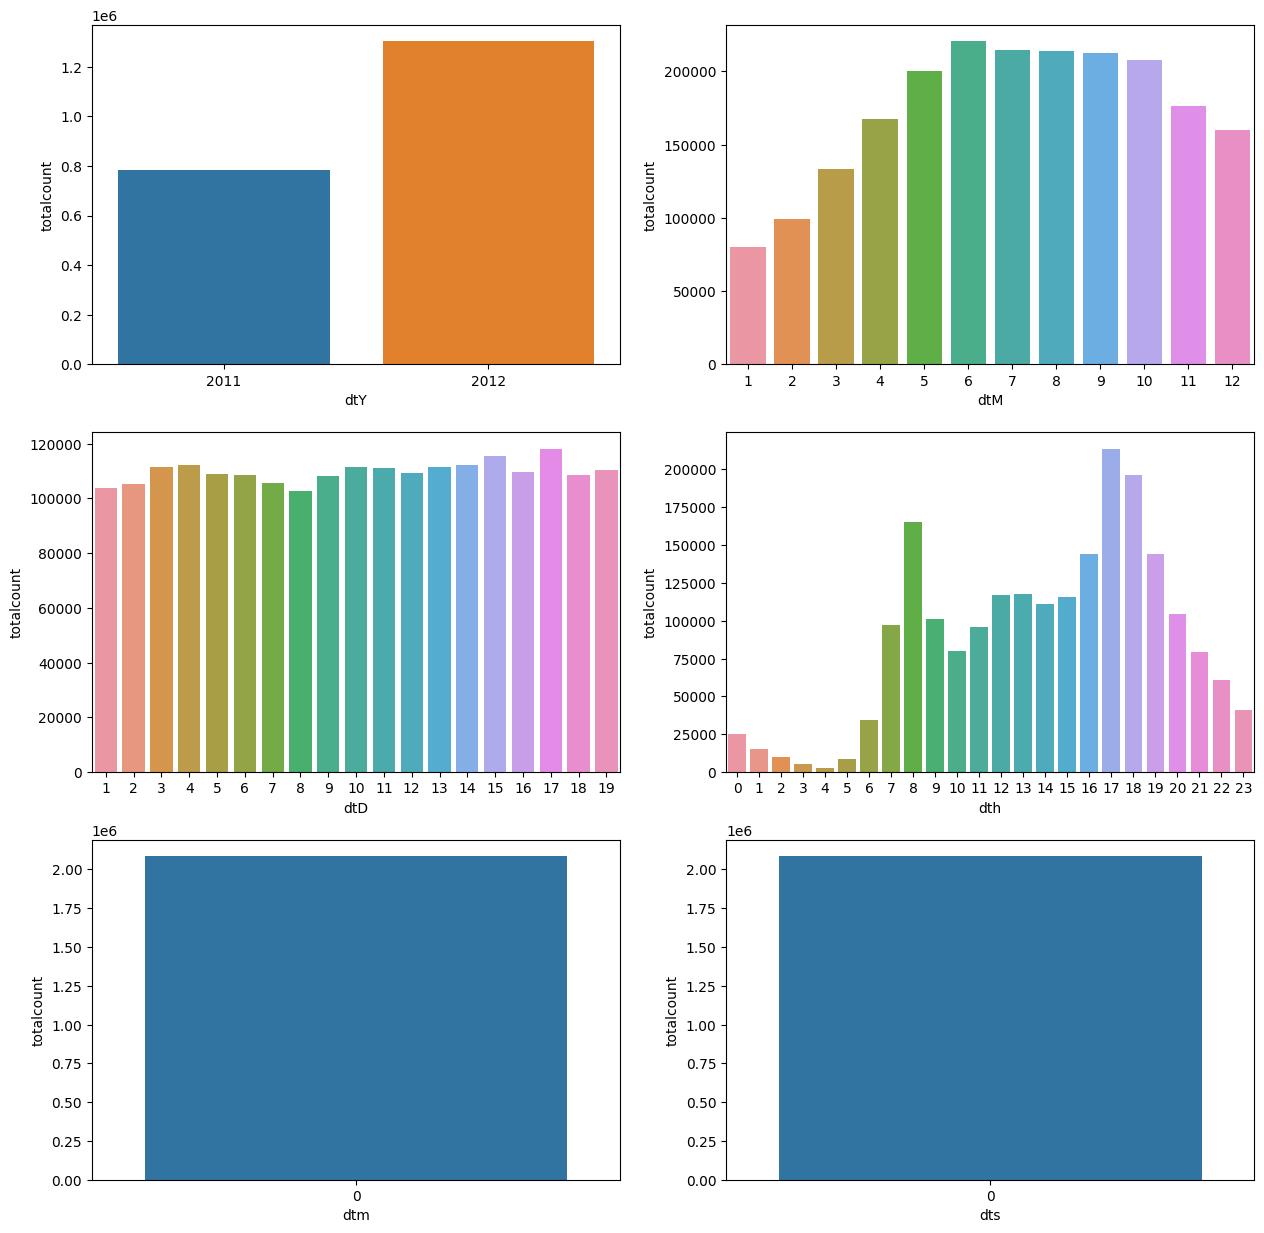

In [259]:
## sns.barplot 과 subplot 이용 한번에 6개의 그래프 시각화
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(15, 15)

sns.barplot(data=year_data, x="dtY", y="totalcount", ax=ax1)
sns.barplot(data=month_data, x="dtM", y="totalcount", ax=ax2)
sns.barplot(data=day_data, x="dtD", y="totalcount", ax=ax3)
sns.barplot(data=hour_data, x="dth", y="totalcount", ax=ax4)
sns.barplot(data=min_data, x="dtm", y="totalcount", ax=ax5)
sns.barplot(data=sec_data, x="dts", y="totalcount", ax=ax6)
plt.show()

데이터를 살펴볼 때부터 알 수 있었지만, 시각화 까지 마치고나니,

역시 『연,월,일,시』 까지는 의미가 있겠지만 『분,초』는 필요가 없겠다는 생각이 든다.

### 4) 데이터 분석

<hr>

일단 『분, 초』 부터 제거하고, 다른 데이터들을 훑어보자.

In [260]:
train_copy = train_copy.drop(columns="dtm", errors="ignore")            ## 분 제거
train_copy = train_copy.drop(columns="dts", errors="ignore")            ## 초 제거
test_copy = test_copy.drop(columns="dtm", errors="ignore")            ## 분 제거
test_copy = test_copy.drop(columns="dts", errors="ignore")            ## 초 제거

데이터상 변화가 느껴지는 부분은 월, 시간 부분이다.

1~3월은 추운날씨 때문인지 대여량이 상대적으로 낮은 것 같다.

1월의 경우는 12월의 거의 반토막으로 보이는데, 

4월과 12월은 비슷한 반면에, 1월부터 4월까지 회복되는 구간을 살펴보면

12월에서 1월로 넘어갈 때 서서히 추워지는게 아니라

갑작스럽게 1월부터 엄청나게 추워지는것 같다.

In [261]:
## 여기서는 데이터 조회를 위해서 pandasql 을 추가로 사용하고자 한다.
from pandasql import sqldf
psqldf = lambda q: sqldf(q, globals())

In [262]:
tempdf = psqldf("select dtM, season, count(dtD) as Day, sum(count) as RentCount from train_copy group by dtM order by dtM asc")
tempdf

,dtM,season,Day,RentCount
0,1,1,884,79884
1,2,1,901,99113
2,3,1,901,133501
3,4,2,909,167402
4,5,2,912,200147
5,6,2,912,220733
6,7,3,912,214617
7,8,3,912,213516
8,9,3,909,212529
9,10,4,911,207434


1월부터 12월까지, season 분류와, 해당하는 일수, 대여량을 확인해 보았다.

1월의 일수가 제일 적고, 2~3월도 약간 적은것을 확인 할 수 이다.

season 의 경우 month 데이터와의 관계를 확인해 보니,

비슷하겠지만 month 데이터가 더 세분화 된 것 같다.

season 컬럼을 안써도 괜찮을 것 같다는 생각이 들지만

그냥 둔다해도 크게 영향을 받을거 같아보이진 않는다.

시간의 경우는 오전 07시 부터 특히 08시 전후로 약간 대여량이 높으며,

오후에는 17시, 18시 전후로 대여량이 높은것을 확인할 수 있다.

사람들이 출퇴근에 자전거를 이용하는 경우가 많은것 같다.

『분, 초』두개의 컬럼은 제거하도록 하겠다.

그리고 『연,월,일,시』 컬럼이 datetime 컬럼을 대체할 수 있으므로

datetime 컬럼도 제거한다.

그리고 train 에는 있지만 test 에는 없는 2개의 컬럼 『casual, registered』도 제거한다.

In [263]:


##train_copy = train_copy.drop(columns="datetime", errors="ignore")       ## datetime 제거  → 나중에

train_copy = train_copy.drop(columns="casual", errors="ignore")         ## 회원등록하지 않은 대여고객
train_copy = train_copy.drop(columns="registered", errors="ignore")     ## 회원등록한 대여고객
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  dtY         10886 non-null  int64         
 11  dtM         10886 non-null  int64         
 12  dtD         10886 non-null  int64         
 13  dth         10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 1.2 MB


<hr>

나머지 데이터들도 하나씩 살펴보자

우선 계절부터 살펴보겠다. 

Season - 봄, 여름, 가을, 겨울 시즌

데이터셋 설명에 따르면, 1 = spring, 2 = summer, 3 = fall, 4 = winter

In [264]:
## value_counts() 함수 : 열의 고유값의 갯수를 가져온다.
## .sort_index() 추가하면 값의 순서대로 정렬 .sort_index(ascending=False) 는 역순
train["season"].value_counts().sort_index()

1    2686
2    2733
3    2733
4    2734
Name: season, dtype: int64

holiday - 휴일 인지 아닌지

In [265]:
train["holiday"].value_counts().sort_index()

0    10575
1      311
Name: holiday, dtype: int64

workingday - 주말도 휴일도 아닌지

In [266]:
train["workingday"].value_counts().sort_index()

0    3474
1    7412
Name: workingday, dtype: int64

holiday 와 workingday 가 뭘 의미하는지 확실히 모르겠어서

연관이 있을 법한 부분을 확인 해 보고자 한다.

holiday, workingday 해당할 경우 대여량에 유의미한 차이가 있는지

평균 일수로 나누어 대여량을 확인 해 보았다.

In [267]:
tempdf = sqldf("select count(holiday), sum(count), sum(count) / count(holiday) from train group by holiday")
tempdf

,count(holiday),sum(count),sum(count) / count(holiday)
0,10575,2027668,191
1,311,57808,185


In [268]:
tempdf = sqldf("select count(workingday), sum(count), sum(count) / count(workingday) from train group by workingday ")
tempdf

,count(workingday),sum(count),sum(count) / count(workingday)
0,3474,654872,188
1,7412,1430604,193


In [269]:
tempdf = sqldf("select count(*), sum(count), sum(count) / count(*) from train")
tempdf

,count(*),sum(count),sum(count) / count(*)
0,10886,2085476,191


분명한 차이를 보이는 건 아니지만, 5％ 미만의 차이를 보이긴 한다.

일단 남겨보도록 하자.

In [270]:
## holiday
2027668 + 57808

2085476

In [271]:
## workingday
654872 + 1430604

2085476

결측치가 없어서 holyday, workingday 모두 더하면 

일수도 전체 일수가 나오지만, 대여량도 전체 대여량이 나온다.

근데 정확히 holiday, workingday 이게 뭘 의미하는지 모르겠다.

대여량에서도 엄청난 차이를 보이는 것 같지 않기도 한 것 같고.

그냥 평일 구분이 애매하니 차라리 월화수목금토일을 사용하는게 어떨까？

괜찮은 아이디어 같으니 이 부분을 컬럼에 추가하도록 하자.

In [272]:
## 요일을 추가 - 하려고 했는데 아까 datetime 날려버림.

## 요일 dtndame 컬럼을 만들어서 추가. 
##train_copy["dtdname"] = train_copy["datetime"].dt.day_name()
## 하려고 했는데 문자열이 되니까 원-핫인코딩 해야함.

## 원-핫인코딩 까지는 복잡할 듯 하고
## 월화수목금토일 영어로 나온 것들을 숫자로 바꾸고
## dtdname 컬럼을 숫자형으로 변경하려 했으나 변경

## 아래의 방법으로 하는게 더 속 편할듯
## weekday 속성을 쓰면, 요일에 해당하는 값을 숫자값으로 가져온다 [0:월 ~ 6:일]
train_copy["dtDidx"] = train_copy["datetime"].dt.weekday
test_copy["dtDidx"] = test_copy["datetime"].dt.weekday
train_copy.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dtY,dtM,dtD,dth,dtDidx
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


<hr>

다음은 날씨를 살펴보자.

In [273]:
tempdf = psqldf("select weather, count(), sum(count) as rentcount, sum(count) / count() as hour_rent from train_copy group by weather")
tempdf

,weather,count(),rentcount,hour_rent
0,1,7192,1476063,205
1,2,2834,507160,178
2,3,859,102089,118
3,4,1,164,164


날씨의 경우 최악의 날씨는 예상치 못한 상황의 날이었거나 시간이었을 것 같다.

In [274]:
tempdf = psqldf("select * from train_copy where weather=4")
tempdf

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dtY,dtM,dtD,dth,dtDidx
0,2012-01-09 18:00:00.000000,1,0,1,4,8.2,11.365,86,6.0032,164,2012,1,9,18,0


2012년 01월 19일 18시가 최악의 날씨로 적혀있다.

온도가 섭씨 8.2도 정도라면 눈이 내렸을 것 같지는 않고

대여수도 164 건이라, 3의 날씨 평균의 경우 (약 118건) 보다 적은 것 같은 느낌이다.

In [275]:
tempdf = psqldf("select * from train_copy where weather=3 and dth=18")
tempdf = psqldf("select sum(count) / count() from tempdf")
tempdf

,sum(count) / count()
0,291


다만 18시로 제한하여 검색한 경우는 대략 18시에 날씨 3 기준으로

평균 291 의 대여횟수가 보이므로 확실히 날씨의 영향을 받았다고 할 수 있겠다.

그렇다면 날씨를 먼저 살펴보기 위해 확인해본 내용은,

18시 뿐이 아니라 새벽시간 같은 자전거를 잘 안타는 시간까지도 계산이 되어있어서,

차이는 확인 할 수 있지만, 확연한 차이는 볼 수 없었던 것으로 생각된다.

이전에, season 은 dtM(월) 으로 대체하는 셈 치고, 여기서는 사용하지 않겠다고 했다.

weather 데이터는 빠져서는 안 될 자료이므로, 이것은 One-hot encoding 해주자.

In [276]:
train_copy = pd.get_dummies(train_copy, columns=["weather"])
test_copy = pd.get_dummies(test_copy, columns=["weather"])

train_copy.tail()

,datetime,season,holiday,workingday,temp,atemp,humidity,windspeed,count,dtY,dtM,dtD,dth,dtDidx,weather_1,weather_2,weather_3,weather_4
10881,2012-12-19 19:00:00,4,0,1,15.58,19.695,50,26.0027,336,2012,12,19,19,2,1,0,0,0
10882,2012-12-19 20:00:00,4,0,1,14.76,17.425,57,15.0013,241,2012,12,19,20,2,1,0,0,0
10883,2012-12-19 21:00:00,4,0,1,13.94,15.910,61,15.0013,168,2012,12,19,21,2,1,0,0,0
10884,2012-12-19 22:00:00,4,0,1,13.94,17.425,61,6.0032,129,2012,12,19,22,2,1,0,0,0
10885,2012-12-19 23:00:00,4,0,1,13.12,16.665,66,8.9981,88,2012,12,19,23,2,1,0,0,0


<hr>

온도, 습도 측정치는 데이터 훑어본 결과 큰 문제점은 발견 못했다.

온도의 경우는 중요한 요소이긴 하다.

다만 온도가 두가지로 자료가 구성되어 있어서 이를 살펴보았는데,

어느정도는 같이 가는 데이터라 하나를 제거할까도 고민을 했지만

체감기온이라는게 또 습도라던가 일조량 등에 따라서 느낌이 달라질 수 있으니

기본 temp 를 삭제하고 atemp 만 사용할까도 생각을 했었는데,

일반적으로 우리가 날씨예보 볼 때, 체감온도 안보고 그냥 기온을 보기 때문에

temp 도 버리기는 아깝다는 생각이 들어서, 둘다 살리는게 좋다고 결론지었다.

마지막으로 이젠 진짜 datetime 컬럼을 삭제해주자

In [277]:
train_copy = train_copy.drop(columns="datetime", errors="ignore")

In [278]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   temp        10886 non-null  float64
 4   atemp       10886 non-null  float64
 5   humidity    10886 non-null  int64  
 6   windspeed   10886 non-null  float64
 7   count       10886 non-null  int64  
 8   dtY         10886 non-null  int64  
 9   dtM         10886 non-null  int64  
 10  dtD         10886 non-null  int64  
 11  dth         10886 non-null  int64  
 12  dtDidx      10886 non-null  int64  
 13  weather_1   10886 non-null  uint8  
 14  weather_2   10886 non-null  uint8  
 15  weather_3   10886 non-null  uint8  
 16  weather_4   10886 non-null  uint8  
dtypes: float64(3), int64(10), uint8(4)
memory usage: 1.1 MB


### 5) X, y 컬럼 선택 및 train/test 데이터 분리

이제 학습을 돌릴 준비를 해야한다.

우선 학습 과정에서 타겟데이터로 사용할 count 컬럼을 y 변수에 할당하고

train 에서 count 컬럼을 삭제한다.

In [279]:
## 타겟데이터를 y 에 할당
y = train_copy["count"]

train_copy = train_copy.drop(columns="count", errors="ignore")
train_copy.tail()

,season,holiday,workingday,temp,atemp,humidity,windspeed,dtY,dtM,dtD,dth,dtDidx,weather_1,weather_2,weather_3,weather_4
10881,4,0,1,15.58,19.695,50,26.0027,2012,12,19,19,2,1,0,0,0
10882,4,0,1,14.76,17.425,57,15.0013,2012,12,19,20,2,1,0,0,0
10883,4,0,1,13.94,15.910,61,15.0013,2012,12,19,21,2,1,0,0,0
10884,4,0,1,13.94,17.425,61,6.0032,2012,12,19,22,2,1,0,0,0
10885,4,0,1,13.12,16.665,66,8.9981,2012,12,19,23,2,1,0,0,0


In [280]:
## 타겟 데이터 y 확인
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

### 6) LinearRegression 모델 학습 과 예측값 출력 및 손실함수값 계산

우선 RMSE 함수를 정의하자.

scikit-Learn 공식 문서에 보면 간단히 활용할 수 있는 내장함수를 제공하고 있다.

[sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

mean_squared_error 함수 파라메터 설명에 따르면

squared=True 로 기본 값이 지정 되어 있는데,

이것을 그대로 사용하면 MSE 값을 반환하게 되어있고,

squared=False 로 지정하게 되면 RMSE 값을 반환하게 되어있다.

이것을 참고로 MSE, RMSE 함수를 정의해놓자.

In [281]:
# RMSE 점수를 계산하기 위함
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_pred):
    return mean_squared_error(y_test, y_pred, squared=False)

def mse(y_test, y_pred):
    return mean_squared_error(y_test, y_pred)

LinearRegression 모델 불러와서 학습 하자

In [282]:
## LinearRegression 모델 불러오기
from sklearn.linear_model import LinearRegression

## LinearRegression
model = LinearRegression()

## 학습／테스트 데이터 분리
X_train, X_test, y_train, y_test = \
    train_test_split(train_copy, y, random_state=1024, test_size=0.2)

## 모델 학습
model.fit(X_train, y_train) 

## 회귀 예측
y_pred = model.predict(X_test)

## RMSE／mse 값 저장
rmse_val = rmse(y_test, y_pred)
mse_val = mse(y_test, y_pred)

print("RMSE：", rmse_val)
print("MSE：", mse_val)

RMSE： 138.8831111569912
MSE： 19288.518564645172


In [283]:
## 결과를 간단하게 확인해보고자 데이터프레임을 하나 새로 만들어 보았다.
train_temp = X_test.copy()      ## 문제 사본에
train_temp["pred"] = y_pred     ## 예측 값과
train_temp["tagt"] = y_test     ## 정답 값을 추가해서
train_temp                      ## 출력해 보았다.

,season,holiday,workingday,temp,atemp,humidity,windspeed,dtY,dtM,dtD,dth,dtDidx,weather_1,weather_2,weather_3,weather_4,pred,tagt
4795,4,0,0,17.22,21.210,47,19.0012,2011,11,12,21,5,1,0,0,0,274.294007,122
6323,1,0,0,12.30,14.395,49,16.9979,2012,2,19,17,6,0,1,0,0,224.992657,157
5297,4,0,1,14.76,18.180,62,7.0015,2011,12,14,19,2,0,1,0,0,224.645530,268
10719,4,0,1,11.48,12.880,52,19.0012,2012,12,13,1,3,0,1,0,0,165.342010,23
8932,3,0,1,32.80,36.365,46,6.0032,2012,8,14,13,1,1,0,0,0,363.889404,286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4809,4,0,0,18.86,22.725,40,27.9993,2011,11,13,11,6,1,0,0,0,226.454810,295
4339,4,0,1,22.14,25.760,94,7.0015,2011,10,12,20,2,0,0,1,0,157.002777,90
1176,1,0,0,18.04,21.970,41,23.9994,2011,3,13,17,6,1,0,0,0,208.147331,241
10021,4,0,1,14.76,16.665,46,16.9979,2012,11,2,22,4,1,0,0,0,344.616163,149


### 7) 예측 결과 시각화

- x 축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기

- x 축에 X 데이터 중 humidity 데이터를, y 축에는 count 데이터를 넣어서 시각화하기

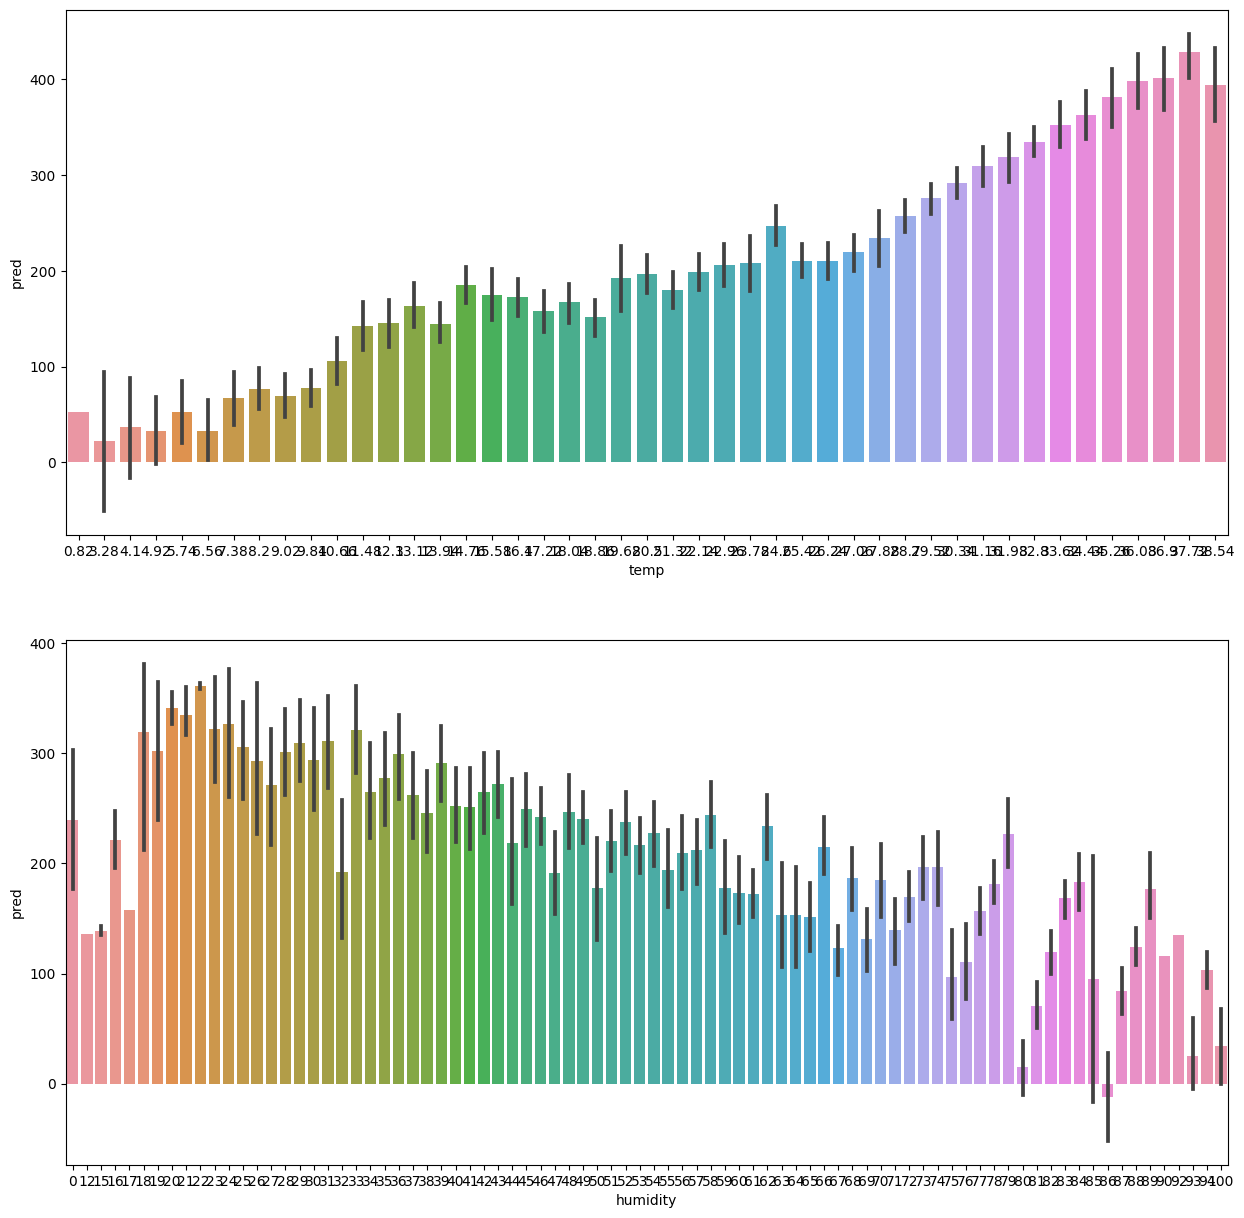

In [292]:

figure, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(15, 15)

## 온도에 따른 대여 건수
sns.barplot(data=train_temp, x="temp", y="pred", ax=ax1)
## 습도에 따른 대여 건수
sns.barplot(data=train_temp, x="humidity", y="pred", ax=ax2)

plt.show()

이거는 가로축으로 하는게 더 보기 편할 것 같다.

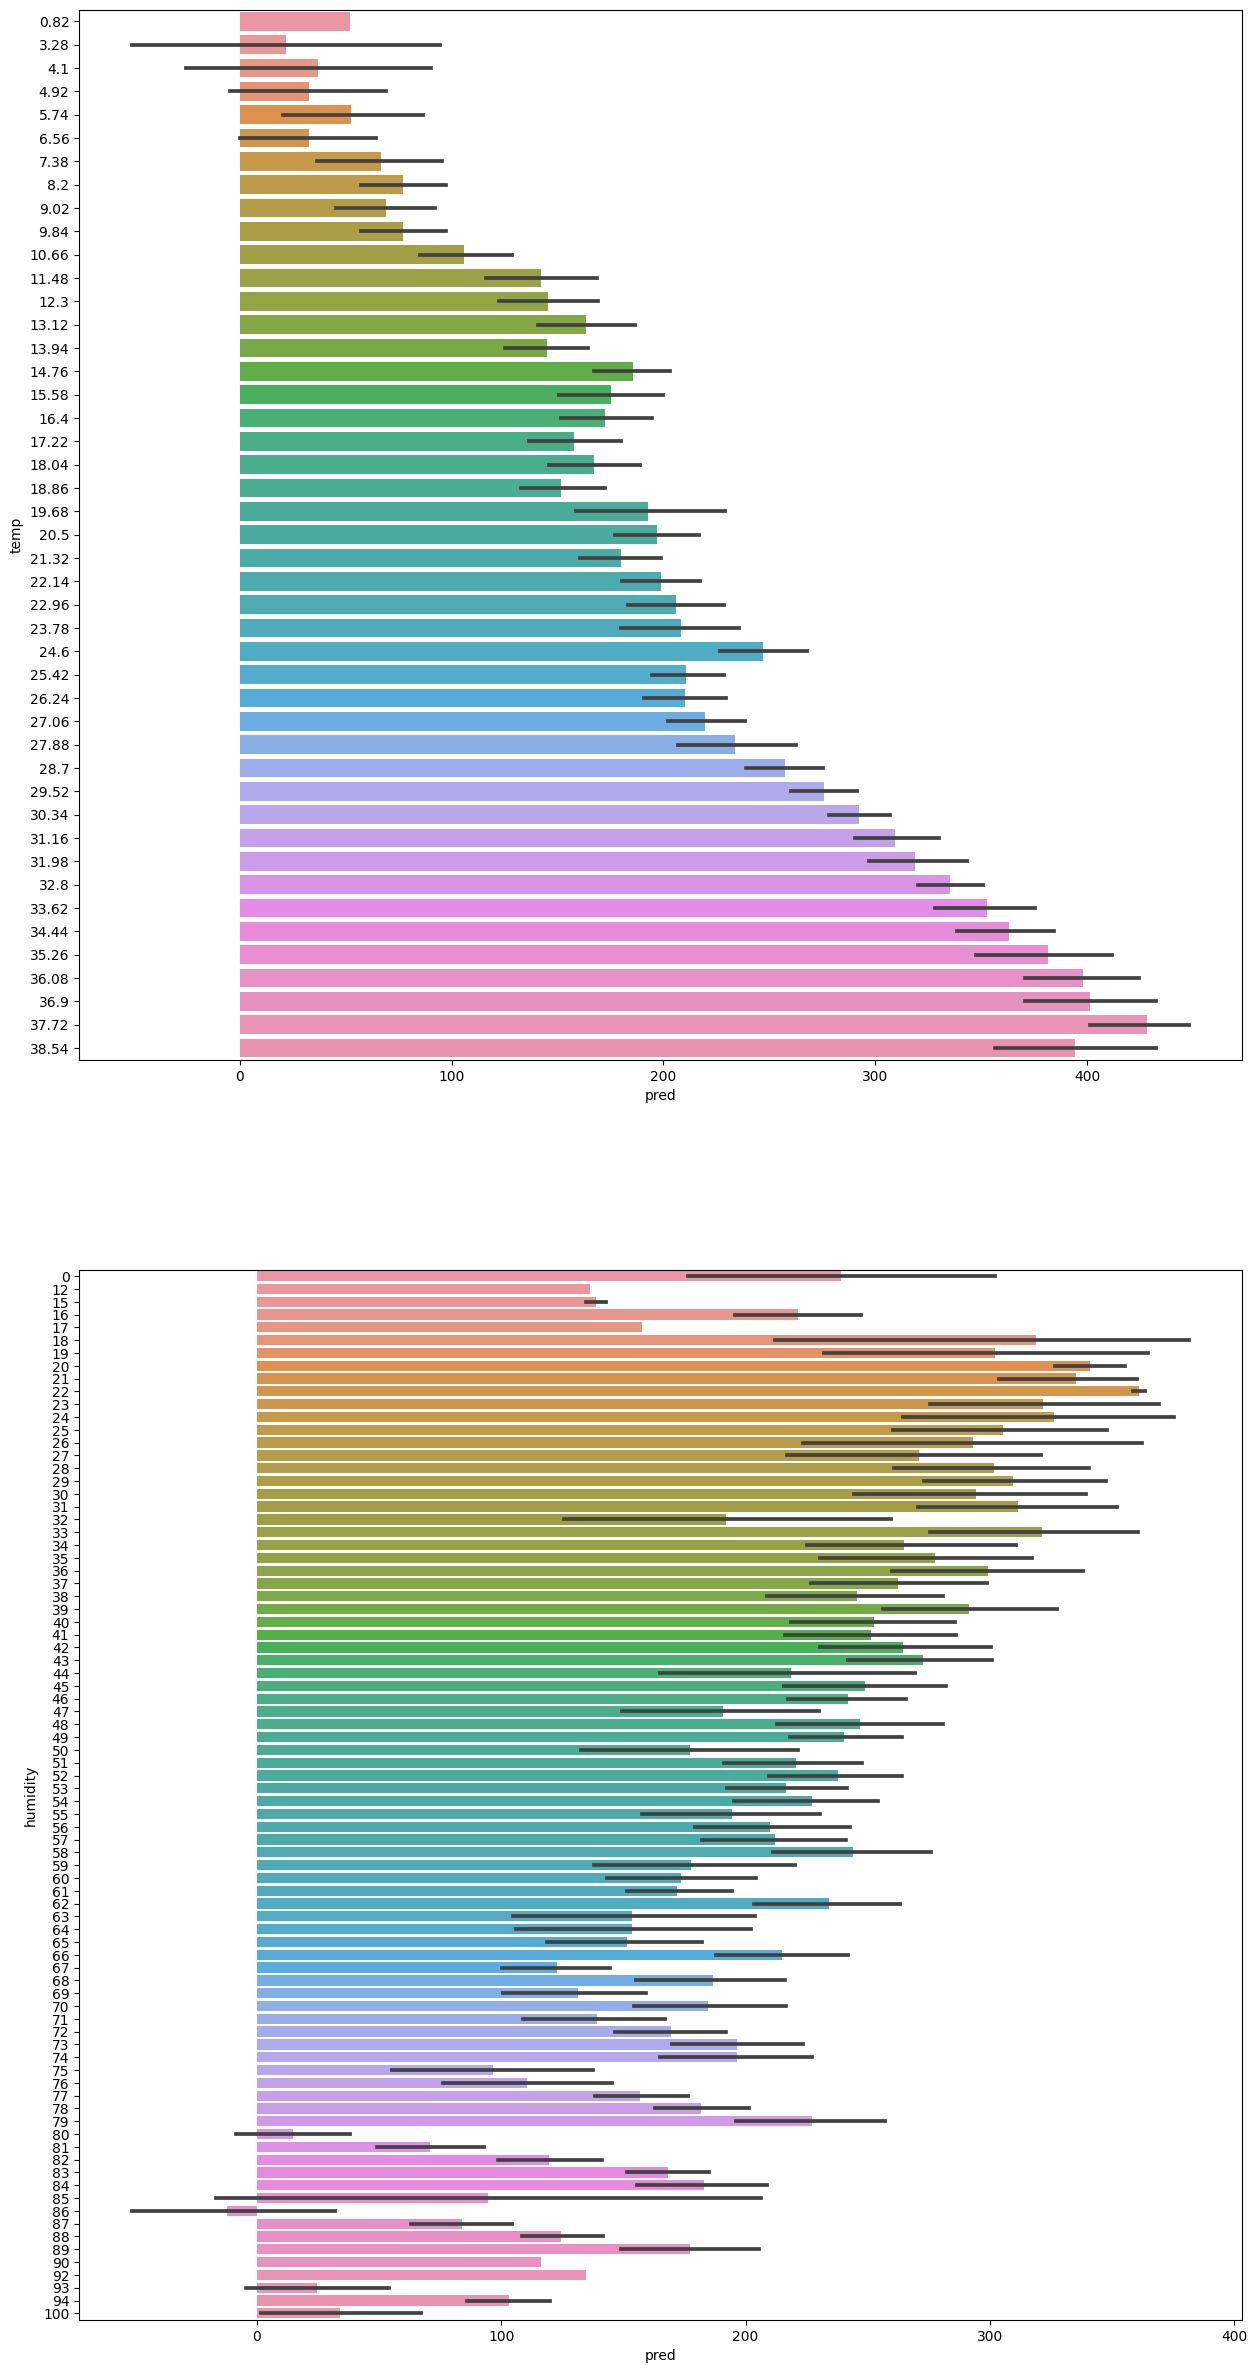

In [295]:
figure, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(15, 30)

## 온도에 따른 대여 건수
sns.barplot(data=train_temp, x="pred", y="temp", orient="h", ax=ax1)
## 습도에 따른 대여 건수
sns.barplot(data=train_temp, x="pred", y="humidity", orient="h", ax=ax2)

plt.show()

# 3. 프로젝트에 대한 회고

### 1) 이번 프로젝트에서 '어려웠던 점'

수학에 대한 이해가 부족하다보니 개념을 파악하느라 상당한 어려움이 있었고, 시간부족도 느꼈다.

pandas 데이터프레임을 원하는 대로 구성하는게 힘들어서 데이터 조사／분석 등에 어려움을 느꼈다.

### 2)프로젝트를 진행하면서 본인이 '학습한 내용'

지난번엔 학습을 통한 분류를 알아봤었고, 이번에는 회귀 예측을 해 보았다.

진행과정에서 분류 학습과는 다른 점들을 실습과 결과를 통해 체험해 볼 수 있었다.

그리고 pandas 공부해야지 해야지 해놓고, 그러지 못하던 와중에,

우연히 인터넷에서 pandasql 이란게 있다는걸 검색하다 알게 됐다.

이번 프로젝트 기간동안에 온갖 트러블에 시달려서,

시간이 부족하다느니 이런저런 변명 늘어놓다가,

마감일이 다가오자 다급한 마음에 pandasql 설치하고 약간 배워서 사용해보았다.

SQL 이 더 친숙하게 느껴져서 괜찮게 쓸만했던 것 같다.

다만 조회는 어지간한건 되는 것 같은데, 변경등은 매우 불편했다.

SQL 이 pandas 보다 편한 점도 있고, pandas 데이터프레임 관련 함수 사용하는게 편한 점도 있는것 같다.

그리고 One-hot encoding 따라만 해 볼때는 이해가 안 됐는데, 

실제로 적용해 볼만한 것 같아서 한번 예전 학습내용 찾아서 해보니

그때 보고 지나쳤던 것 보다 의외로 적용도 간단하다는 생각이 들었고,

실제로 해보니 One-hot encoding 이란 이런거구나 하고 알 수 있었던 기회였다.

### 3)프로젝트를 진행하면서 '알아낸 점' 혹은 '아직 모호한 점'

손실함수의 용도와 RMSE, MSE 가 왜 필요한지 전혀 감이 안왔었는데,

경사하강법과 함께 이론을 확인하면서 약간 이해가 되기 시작했다.

모호한 점은 EDA 나 컬럼들을, 조정이 필요한지 여부의 선택에

근거가 모호하다보니 확신이 가지 않아서, 거의 대부분은 원래의 형태로 학습에 이용했다.

생각보다 오차가 많이 나와서 아쉬웠다.

### 4) 루브릭 평가 지표를 맞추기 위해 '시도한 것들'

지표를 더 좋게 하고 예측 결과를 정확하게 하기 위한 시간이 여러모로 부족해서 

평가 지표를 더 잘나오게 하기 위한 다른 시도는 해 볼 수 없었다.

### 5) 만약에 '루브릭 평가 지표를 달성하지 못했을 때, 이유에 관한 추정'

루브릭 평가 지표인 

- 프로젝트 1 MSE 손실한수 값 3000 이하 : 2983

- 프로젝트 2 RMSE 값 150 미만 : 138
 
두개 모두 겨우 달성은 했다. 

하지만 역시나 돌 다 결과 데이터 비교해보니 실제와의 괴리가 컸다.

EDA 나 데이터 조작등에 시간을 들여서 이상치를 확인하거나

편중된 그래프가 많이 보이면 정규분포등을 활용해서 값들을 조정을 한다면

조금이나마 예측 정확도를 높일 수 있지 않을까 생각한다.

### 6) 자기 다짐

여러가지 트러블 때문에 부족한 시간이 더 부족해져서 힘들었다.

마크다운과 코드 분량을 줄이도록 해야 할 것 같다.

평가 지표를 위한 시간과 노력을 더 투자 해야겠다.

프로젝트 2 의경우 train 데이터만 활용했어도 지장 없는데

test 데이터 까지 받아와서 (쓰는 건 줄 알았다)

그부분 까지 고려해서 이것저것 하다가, 프로젝트 막바지 도달할 때 쯤

「이거 가져와서 이것저것 손 댈 필요 없었네, 시간 낭비였네」

생각이 들었었다. 자꾸 왜 이런 트랩에 걸려드는지 모르겠다. 조심하자.

### 7) Reference

◎ scikit-Learn (https://scikit-learn.org/) : 세부 웹페이지는 각 참고한 부분의 시작 부분에서 하이퍼링크를 적용하였다. 이하는 그 목록.

 - [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

 - [sklearn.datasets.load_diabetes 항목](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)

◎ Wiki : 이미지와 본문 중 인용한 부분이 있다. 이하는 그 목록.

 - [당뇨병 5. 원인 - 나무위키](https://namu.wiki/w/%EB%8B%B9%EB%87%A8%EB%B3%91#toc)

 - [위키백과 우리 모두의 백과사전 - 미분](https://ko.wikipedia.org/wiki/%EB%AF%B8%EB%B6%84)

 - [위키백과 우리 모두의 백과사전 - 정의역](https://ko.wikipedia.org/wiki/%EC%A0%95%EC%9D%98%EC%97%AD)
 
 
◎ 그 외 : LMS 학습자료 에서 이미지 와 본문 중 인용한 부분이 있다.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;그 외 대부분의 참고 자료는 해당 참고 자료 인용한 부분 바로 아래에 ※ 기호와 함께 표기하였다.

 - [Kaggle - Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand/data)





<hr>